In [1]:
#importing libraries
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting dataframe for the online shopping stores
df = pd.read_csv('/Users/stevenfernandez/Desktop/Python Class/BAFALL2023-Assignments-Steven-Fernandez/Final Project/e_commerce_shipping.csv')

In [4]:
#visual check of the data
df

,Order_Customer_Id,Order_City,Order_State,Order_Country,order_date_DateOrders,Order_Item_Discount_Rate,Order_Item_Product_Price,Order_Region,Order_Profit_Per_Order,Order_Item_Quantity,...,Type,Sales,Order_Status,Category_Name,Product_Name,Days_for_shipping_real,Days_for_shipment_scheduled,Delivery_Status,Shipping_Mode,Market
0,509,Rome,Lacio,Italia,2017-06-18 21:20:00.0000000,0.12,129.990005,Southern Europe,19.100000,1,...,DEBIT,129.990005,ON_HOLD,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,3,2,Late delivery,Second Class,Europe
1,10099,Rambouillet,Isla de Francia,Francia,2015-10-01 11:42:00.0000000,0.15,129.990005,Western Europe,37.349998,1,...,DEBIT,129.990005,ON_HOLD,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,2,2,Shipping on time,Second Class,Europe
2,10099,Rambouillet,Isla de Francia,Francia,2015-10-01 11:42:00.0000000,0.16,299.980011,Western Europe,27.719999,1,...,DEBIT,299.980011,ON_HOLD,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,2,2,Shipping on time,Second Class,Europe
3,1146,Dresden,Sajonia,Alemania,2017-06-25 02:14:00.0000000,0.16,129.990005,Western Europe,37.130001,1,...,DEBIT,129.990005,ON_HOLD,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,3,2,Late delivery,Second Class,Europe
4,10099,Rambouillet,Isla de Francia,Francia,2015-10-01 11:42:00.0000000,0.16,129.990005,Western Europe,49.139999,1,...,DEBIT,129.990005,ON_HOLD,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,2,2,Shipping on time,Second Class,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,10711,Seúl,Seúl,Corea del Sur,2016-01-18 00:31:00.0000000,0.00,399.980011,Eastern Asia,135.190002,1,...,DEBIT,399.980011,COMPLETE,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,2,4,Advance shipping,Standard Class,Pacific Asia
180515,5424,Rockhampton,Queensland,Australia,2016-01-16 15:14:00.0000000,0.05,399.980011,Oceania,42.939999,1,...,PAYMENT,399.980011,PENDING_PAYMENT,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,2,4,Advance shipping,Standard Class,Pacific Asia
180516,5424,Rockhampton,Queensland,Australia,2016-01-16 15:14:00.0000000,0.06,399.980011,Oceania,23.809999,1,...,PAYMENT,399.980011,PENDING_PAYMENT,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,2,4,Advance shipping,Standard Class,Pacific Asia
180517,5424,Rockhampton,Queensland,Australia,2016-01-16 15:14:00.0000000,0.07,399.980011,Oceania,125.730003,1,...,PAYMENT,399.980011,PENDING_PAYMENT,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,2,4,Advance shipping,Standard Class,Pacific Asia


In [5]:
#understanding the data types for each column of data
df.dtypes

Order_Customer_Id                int64
Order_City                      object
Order_State                     object
Order_Country                   object
order_date_DateOrders           object
Order_Item_Discount_Rate       float64
Order_Item_Product_Price       float64
Order_Region                    object
Order_Profit_Per_Order         float64
Order_Item_Quantity              int64
Order_Item_Profit_Ratio        float64
Order_Item_Total               float64
Type                            object
Sales                          float64
Order_Status                    object
Category_Name                   object
Product_Name                    object
Days_for_shipping_real           int64
Days_for_shipment_scheduled      int64
Delivery_Status                 object
Shipping_Mode                   object
Market                          object
dtype: object

In [3]:
#setting dates from objects to datetime data type
df['order_date_DateOrders'] = pd.to_datetime(df['order_date_DateOrders'])

In [285]:
print(df['Order_Country'])

0                Italia
1               Francia
2               Francia
3              Alemania
4               Francia
              ...      
180514    Corea del Sur
180515        Australia
180516        Australia
180517        Australia
180518        Australia
Name: Order_Country, Length: 180519, dtype: object


##Profit Optimization

In [8]:
##Increasing Profits
profit_df = df[['order_date_DateOrders', 'Order_Profit_Per_Order']]

In [10]:
#indexing the date
profit_df.set_index('order_date_DateOrders', inplace=True)

In [12]:
#grouping and ordering the data by month
monthly_profit_data = profit_df['Order_Profit_Per_Order'].resample('M').sum()
monthly_profit_data.head

<bound method NDFrame.head of order_date_DateOrders
2015-01-31    111660.740132
2015-02-28     99140.660196
2015-03-31    113778.210191
2015-04-30    108083.679957
2015-05-31    112147.900143
2015-06-30    110147.160313
2015-07-31    115624.059879
2015-08-31    117979.770302
2015-09-30    113467.940118
2015-10-31    101757.870040
2015-11-30    104427.360120
2015-12-31    110641.549881
2016-01-31    106780.950229
2016-02-29     86809.490642
2016-03-31    101259.990250
2016-04-30    114976.619907
2016-05-31    110716.120111
2016-06-30    104196.070108
2016-07-31    119941.720183
2016-08-31    110729.540117
2016-09-30    123384.709977
2016-10-31    116781.970048
2016-11-30    109539.199962
2016-12-31    105002.689937
2017-01-31    114843.850277
2017-02-28    115111.070097
2017-03-31    118688.900211
2017-04-30    115961.060193
2017-05-31    115014.640014
2017-06-30    110399.290305
2017-07-31    113026.700038
2017-08-31    131501.160211
2017-09-30    122462.390153
2017-10-31    113447.169

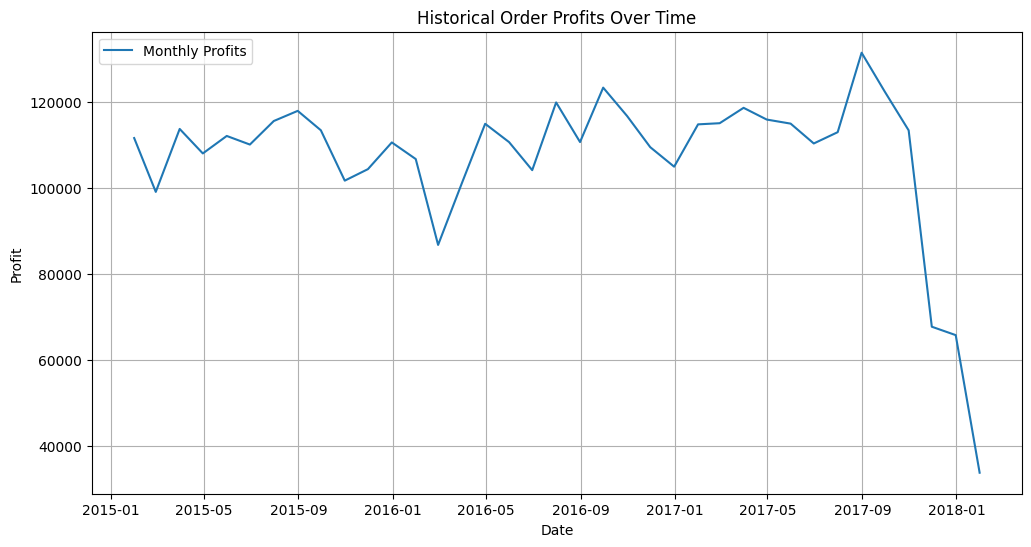

In [14]:
#visualizing the profit trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit_data.index, monthly_profit_data.values, label='Monthly Profits')
plt.title('Historical Order Profits Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#accesing relavent data to calculate the popularity of orders for each market
market_customer_count = df[['Market', 'Order_Customer_Id']]

In [29]:
#grouping by market and making order customer IDs as value counts in order to get a sense of where is most of our orders going, in the markets that we are exposed to
market_customer_count = market_customer_count.groupby('Market')['Order_Customer_Id'].value_counts().reset_index()

In [31]:
#order customer id column is not relevant anymore
market_customer_count.drop(columns= 'Order_Customer_Id', inplace= True)

In [32]:
#creating a group by in order to sum up the count of the order customer ids counts by each market
market_customer_count = market_customer_count.groupby('Market')['count'].sum().sort_values(ascending= False).reset_index()

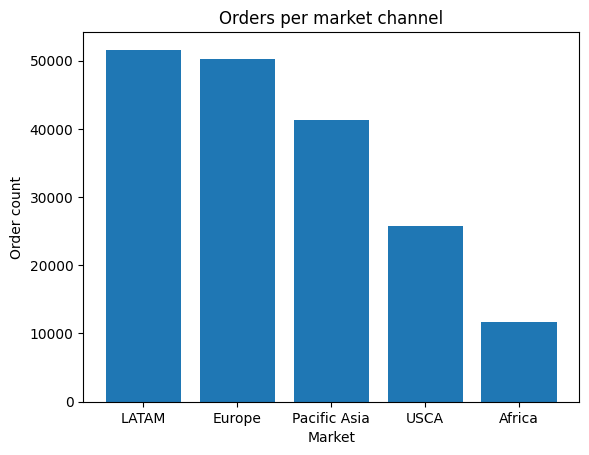

In [33]:
#visualizing the data
plt.bar(market_customer_count.Market, market_customer_count['count'])
plt.title('Orders per market channel')
plt.xlabel('Market')
plt.ylabel('Order count')
plt.show()

In [35]:
#understanding what are most hotest selling countries. we do this by seeing which countries had the most orders
Heatmap_df = df[['Order_Country', 'Order_Customer_Id']]

In [36]:
#setting all rows in the country column as string types
Heatmap_df.loc[:, 'Country'] = Heatmap_df['Order_Country'].astype(str)

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_17055/4195715679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heatmap_df.loc[:, 'Country'] = Heatmap_df['Order_Country'].astype(str)


In [37]:
#grouping and aggregating data
Heatmap_df = Heatmap_df.groupby('Order_Country')['Order_Customer_Id'].count().reset_index(name='Order_Count')

In [38]:
#top10 countries with the most orders
Heatmap_df_top10 = Heatmap_df.nlargest(10, 'Order_Count')

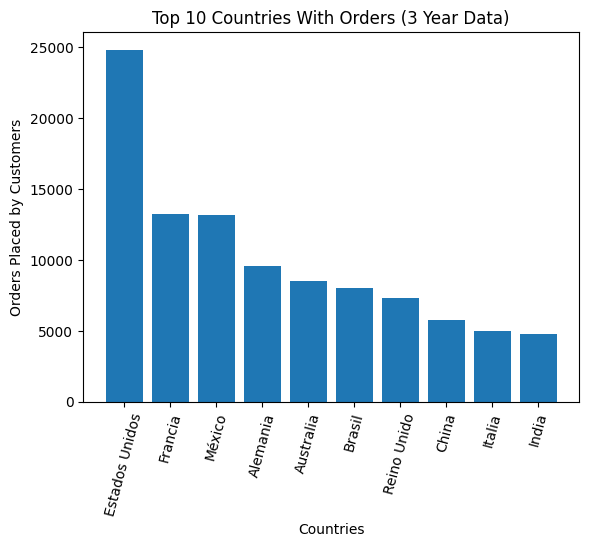

In [39]:
#visualizing the data
plt.bar(Heatmap_df_top10.Order_Country, Heatmap_df_top10.Order_Count)
plt.xticks(rotation=75)
plt.title('Top 10 Countries With Orders (3 Year Data)')
plt.xlabel('Countries')
plt.ylabel('Orders Placed by Customers')
plt.show()

In [19]:
#we wanted to know which product category are the most sold from our inventory
category_demand = df[['Market','Category_Name', 'Order_Item_Quantity']]

In [20]:
#grouping the data by category name and summing it by order item quantity
quantity_category_demand = category_demand.groupby('Category_Name')['Order_Item_Quantity'].sum().sort_values(ascending= False).reset_index()

In [21]:
#setting it to the top 30 product category
quantity_category_demand_top30 = quantity_category_demand.nlargest(30, 'Order_Item_Quantity').sort_values(by= 'Order_Item_Quantity')

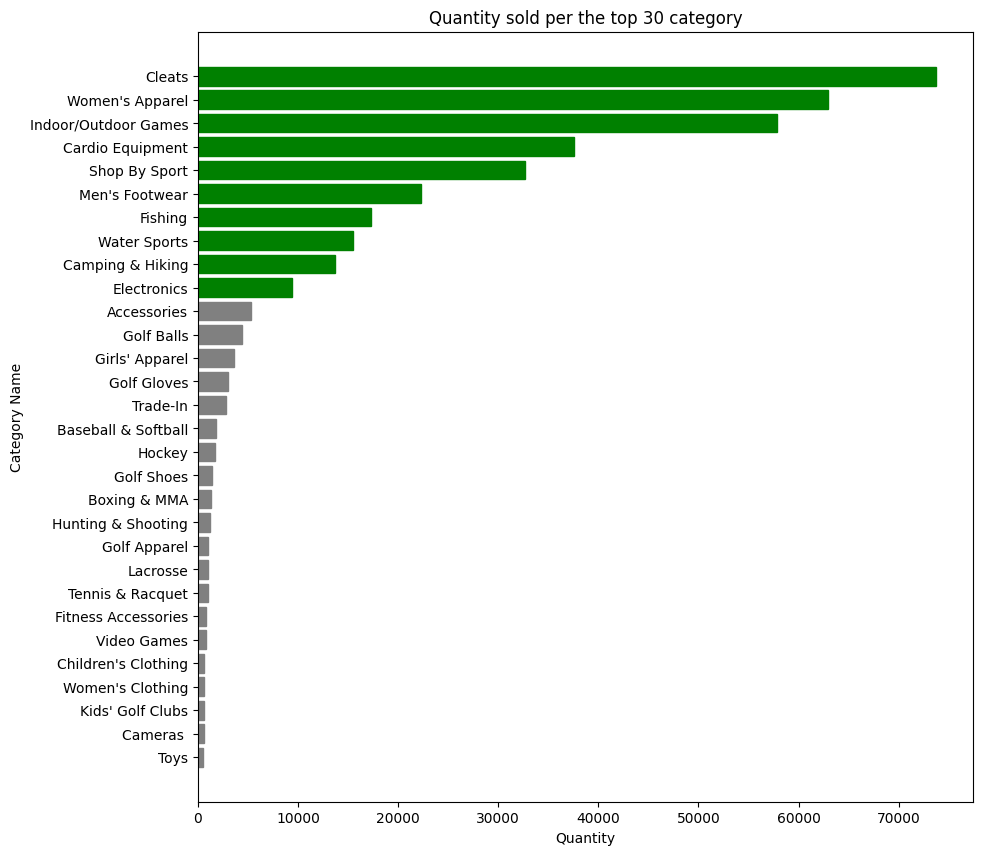

In [24]:
#visualizing the data in a plot
fig, ax = plt.subplots(figsize = (10, 10))
barplot = ax.barh(quantity_category_demand_top30.Category_Name, quantity_category_demand_top30.Order_Item_Quantity)

#searching for the top 10 product category in the top 30 and then taking the index and putting it in an index
top_10 = quantity_category_demand_top30.nlargest(10, 'Order_Item_Quantity').index.to_list()

#enumerating the bar plot so that we can get the index with the corresponding values. then we iterate through it and find the top 10 values and the color of the bar to green
#credit to John Droescher and Steven Chu for the for loop nad if statement
for i, bar in enumerate(barplot):
    if quantity_category_demand_top30.index[i] in top_10:
        bar.set_color('green')
    else: 
        bar.set_color('grey')

plt.title('Quantity sold per the top 30 category')
plt.xlabel('Quantity')
plt.ylabel('Category Name')
plt.show()

In [186]:
#understanding which products performed well in terms of profit margin
profitmargin_df = df[['Category_Name', 'Market', 'Order_Item_Profit_Ratio']]

In [187]:
#grouping the data by category name and finding the average profit margins
profitmargin_df = profitmargin_df.groupby('Category_Name')['Order_Item_Profit_Ratio'].mean().reset_index()
profitmargin_df

,Category_Name,Order_Item_Profit_Ratio
0,Accessories,0.132433
1,As Seen on TV!,0.064853
2,Baby,0.139420
3,Baseball & Softball,0.137959
4,Basketball,0.108060
5,Books,0.079062
6,Boxing & MMA,0.112600
7,CDs,0.135904
8,Cameras,0.126470
9,Camping & Hiking,0.115947


In [192]:
#sorting by the top 20 largest average profit margins in ascending fasion to get a better visualization of the data and identify the top performers
profitmargin_df_top20 = profitmargin_df.nlargest(20, 'Order_Item_Profit_Ratio').sort_values(by= 'Order_Item_Profit_Ratio', ascending= False)

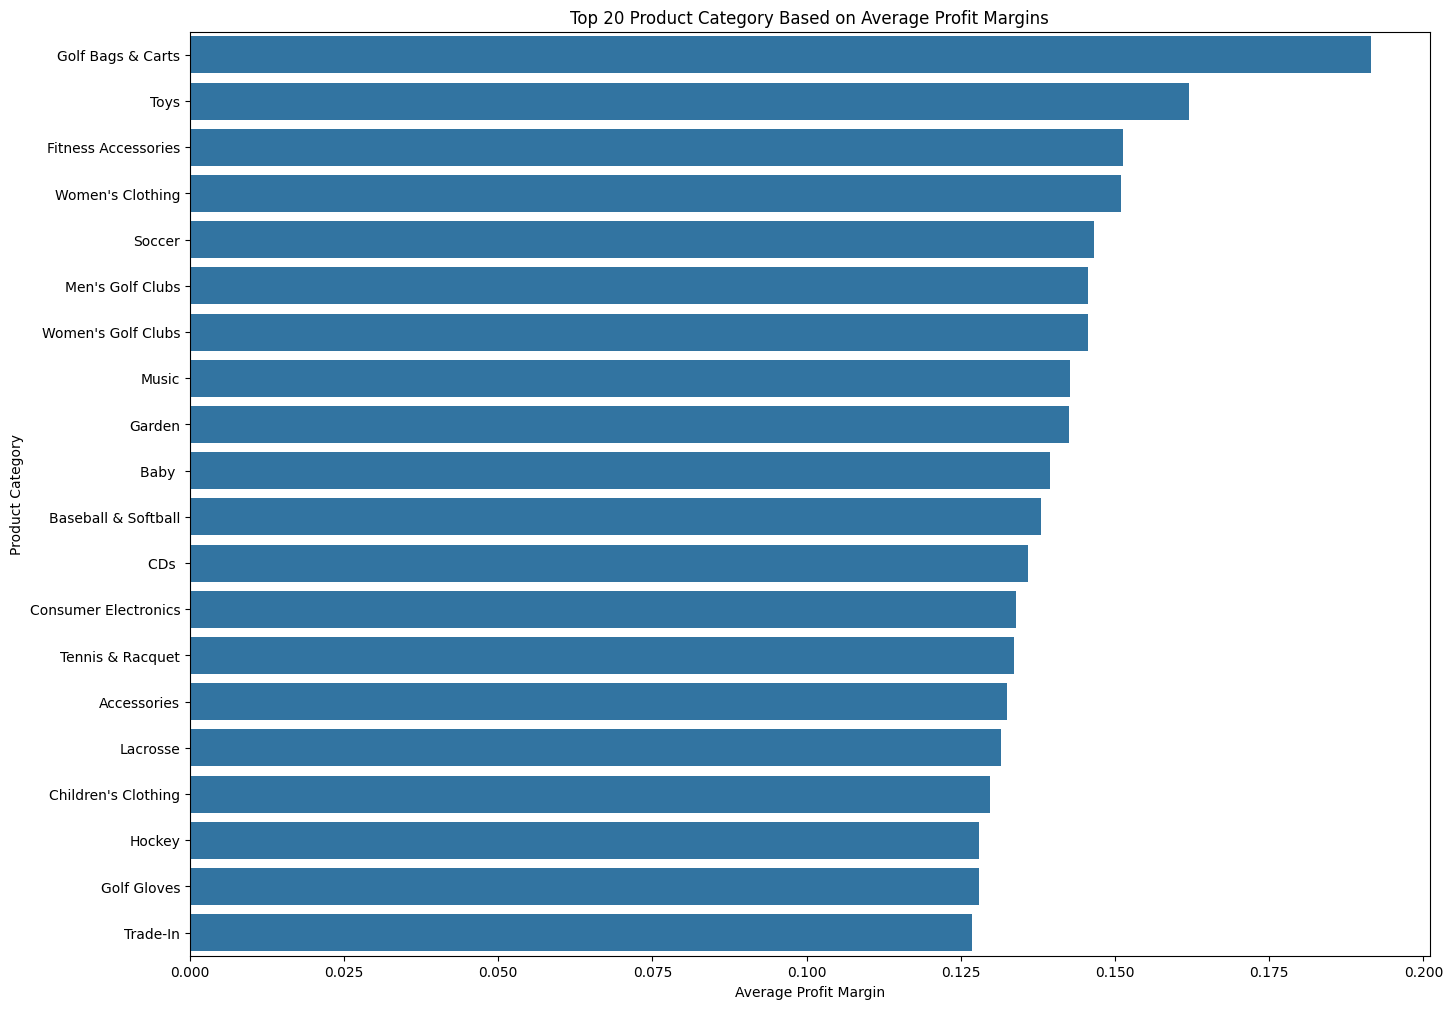

In [193]:
#visualizing the data

plt.figure(figsize=(16, 12))

sns.barplot(x='Order_Item_Profit_Ratio', y='Category_Name', data=profitmargin_df_top20)
plt.xlabel('Average Profit Margin')
plt.ylabel('Product Category')
plt.title('Top 20 Product Category Based on Average Profit Margins')

plt.show()

In [197]:
profitmargin_df
quantity_category_demand

#merging both the profit margin and quantity sold per product category tables
joined_quantity_profitmargin_df = pd.merge(profitmargin_df, quantity_category_demand, how= 'inner' , on= 'Category_Name')

#setting the category name as the index
joined_quantity_profitmargin_df.set_index('Category_Name', inplace = True)

joined_quantity_profitmargin_df

,Order_Item_Profit_Ratio,Order_Item_Quantity
Category_Name,,
Accessories,0.132433,5349
As Seen on TV!,0.064853,206
Baby,0.139420,207
Baseball & Softball,0.137959,1785
Basketball,0.108060,67
Books,0.079062,405
Boxing & MMA,0.112600,1265
CDs,0.135904,271
Cameras,0.126470,592


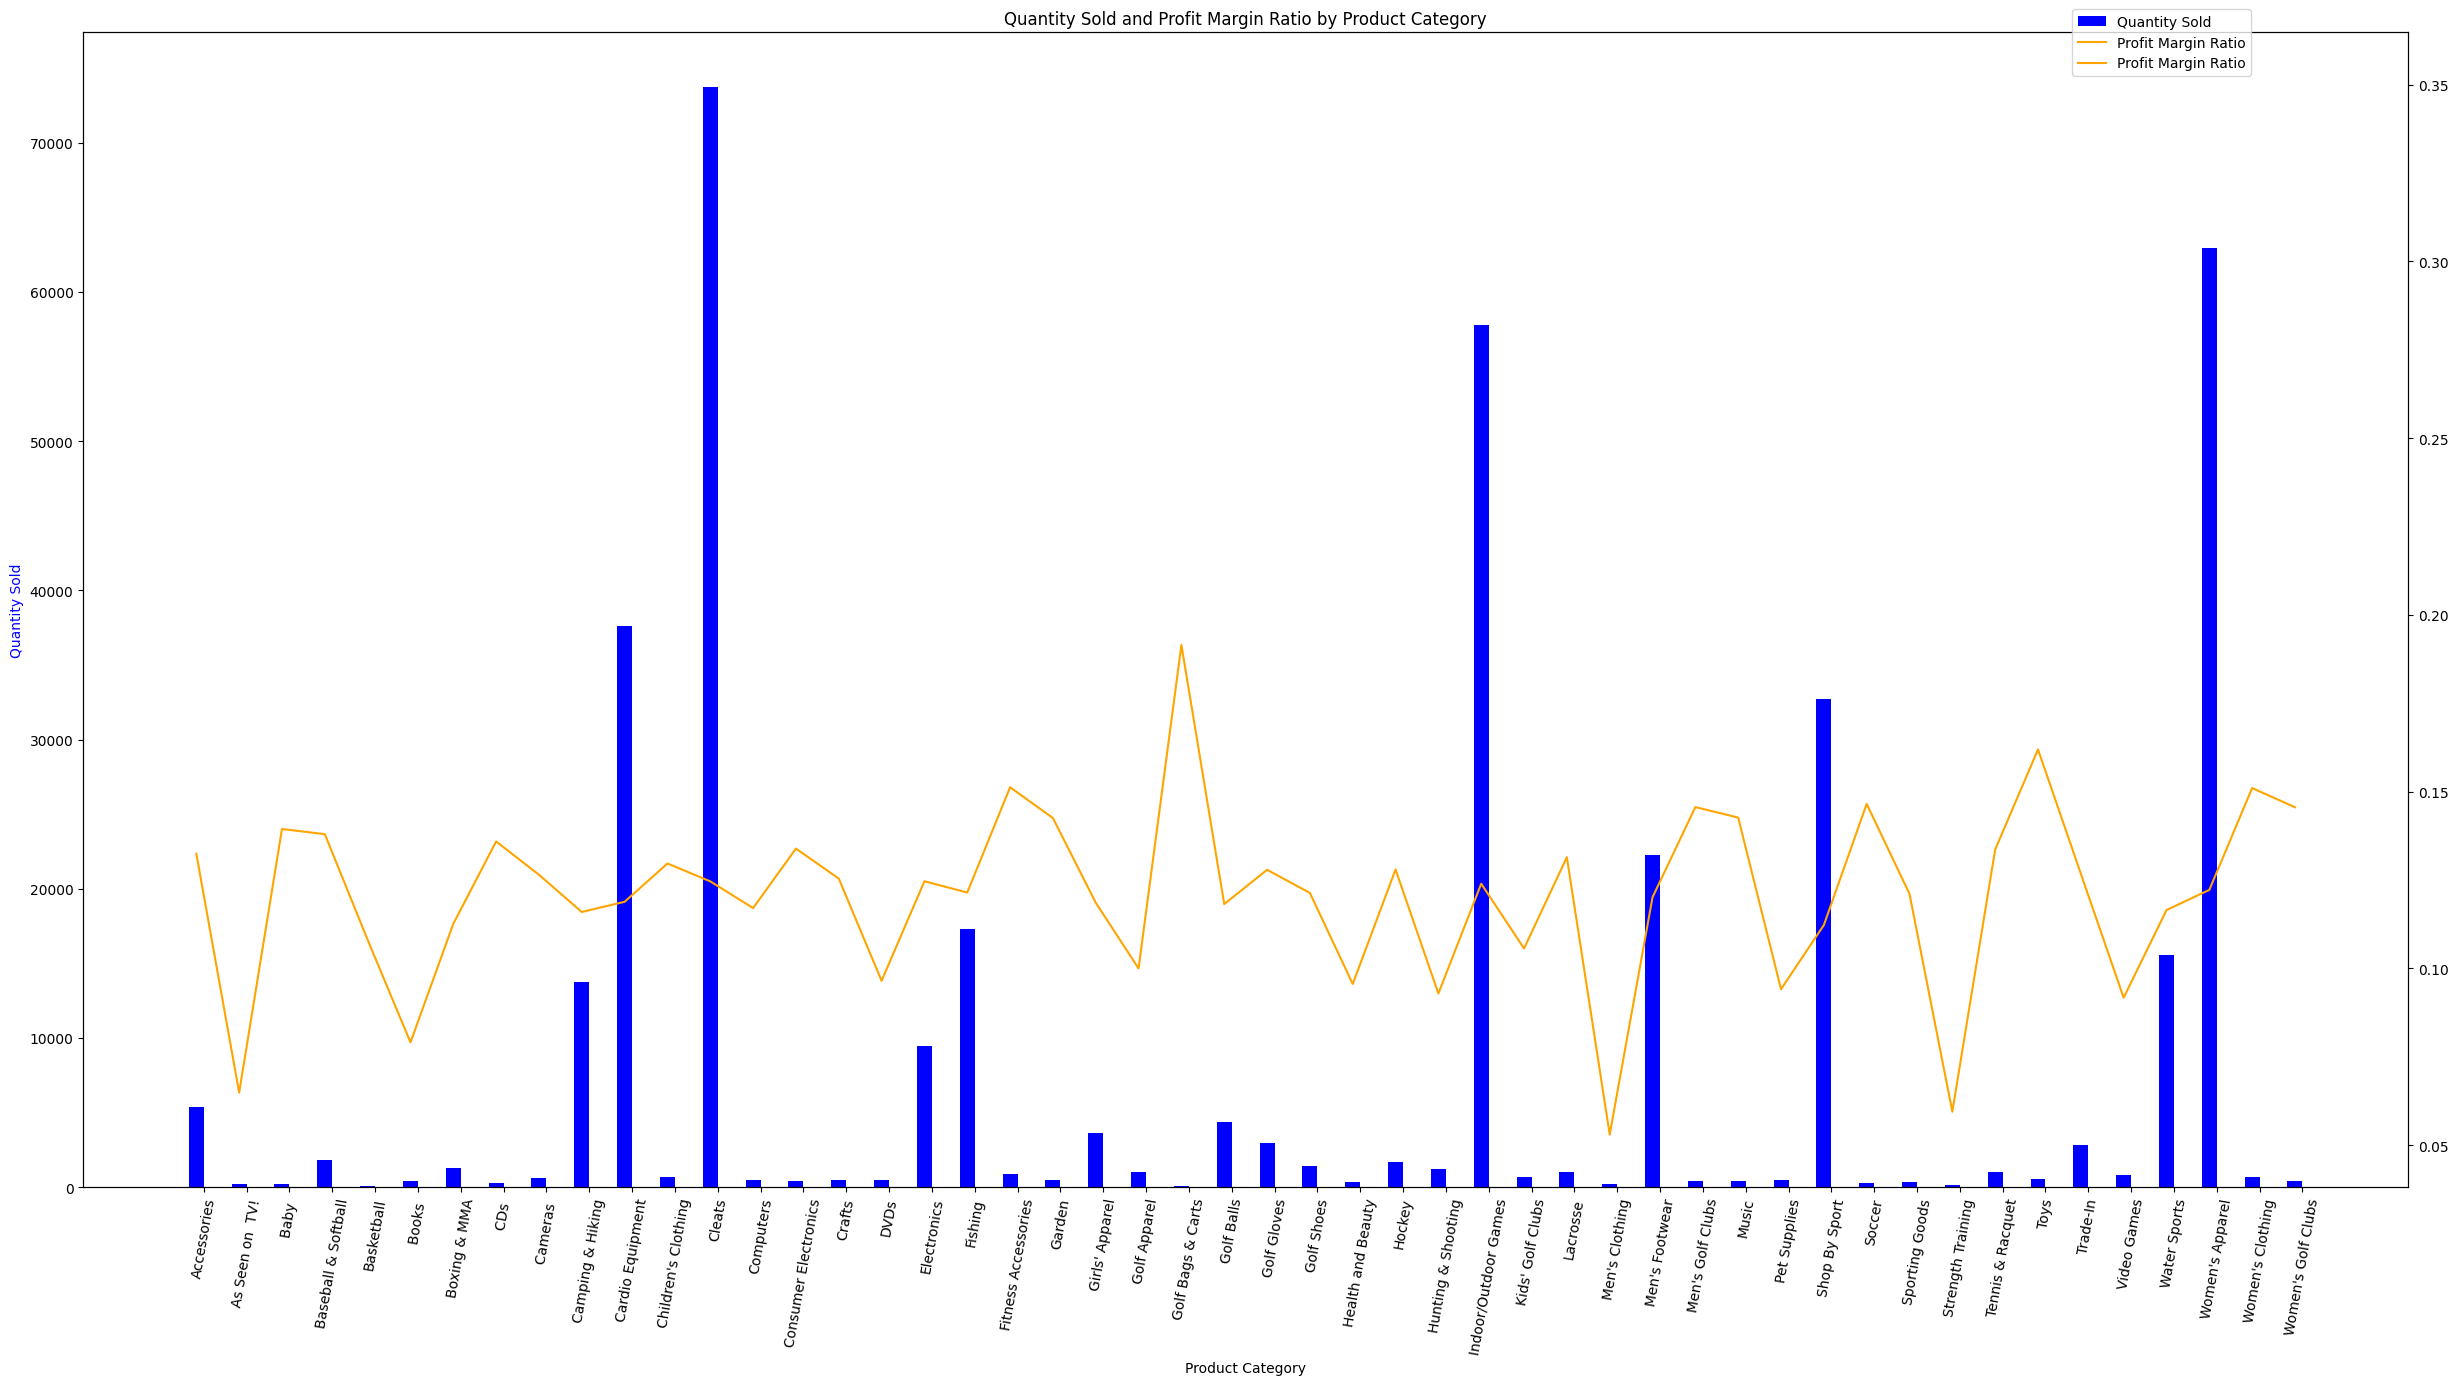

In [216]:
#visualizing the data
fig, ax1 = plt.subplots(figsize=(30, 15))

#Set the width of the bars
bar_width = 0.35

#Create side-by-side bars for QuantitySold
bar1 = ax1.bar(joined_quantity_profitmargin_df.index, joined_quantity_profitmargin_df['Order_Item_Quantity'], bar_width, label='Quantity Sold', color='blue')

#Set labels and title
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Quantity Sold', color='blue')
ax1.set_title('Quantity Sold and Profit Margin Ratio by Product Category')

#create a second y-axis for profit margin
ax2 = ax1.twinx()

#Create side-by-side bars for ProfitMarginRatio
bar2 = ax2.plot(joined_quantity_profitmargin_df.index, joined_quantity_profitmargin_df['Order_Item_Profit_Ratio'], bar_width, label='Profit Margin Ratio', color='orange')

#Adjust x-axis ticks for better alignment
ax1.set_xticks(np.arange(len(joined_quantity_profitmargin_df.index)) + bar_width / 2)
ax1.set_xticklabels(joined_quantity_profitmargin_df.index, rotation= 80)

#Display the legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9))

#Show the plot
plt.show()

In [20]:
#grouping by market in order to understand to see if there is any difference in hotest sales for each product category at each market
market_category_demand = category_demand.groupby('Market')

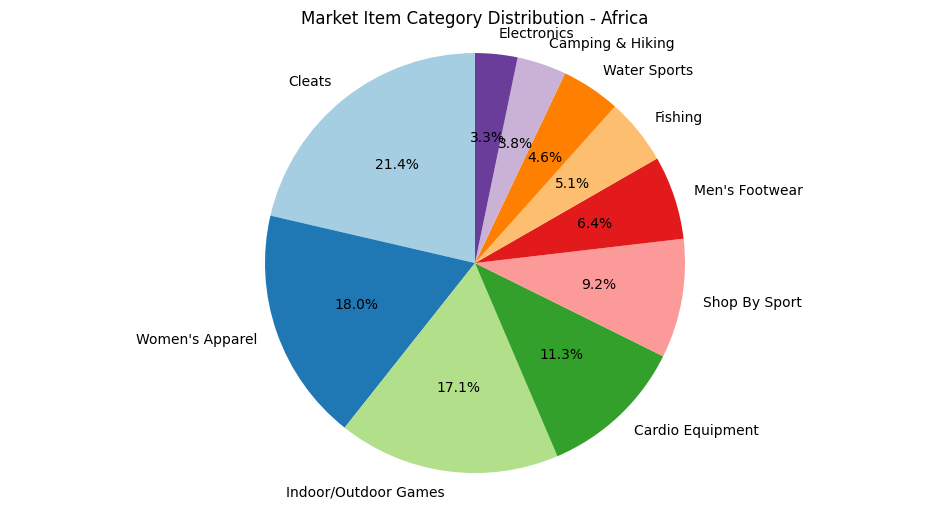

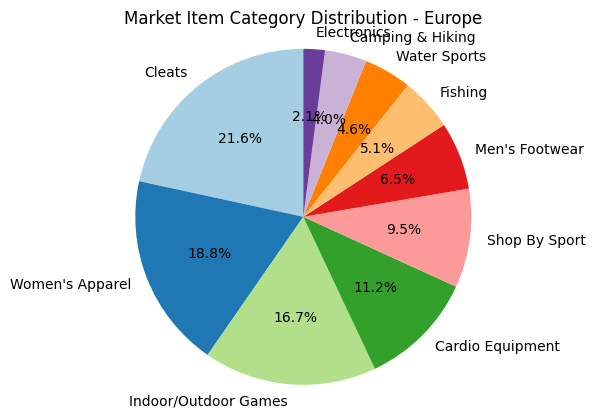

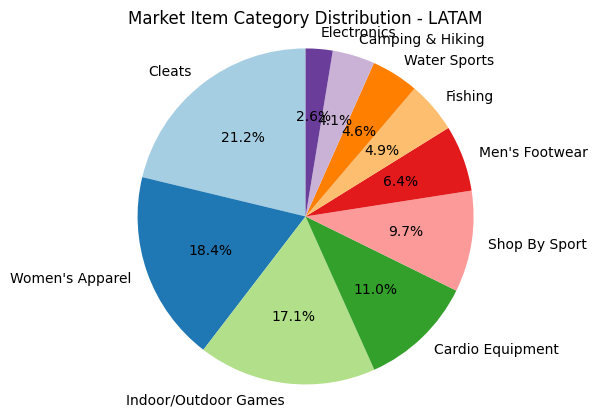

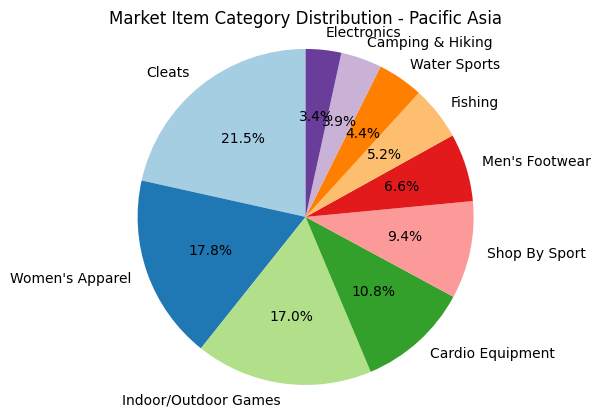

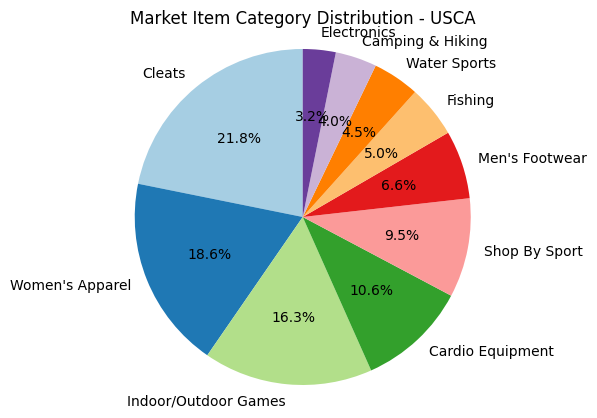

In [21]:
fig = plt.figure(figsize=(12, 6))

for market, market_data in market_category_demand:
    # Grouping the data and summing the quantities by category_name
    category_group_data = market_data.groupby('Category_Name')['Order_Item_Quantity'].sum().nlargest(10).sort_values(ascending=False)

    # Getting the market share distribution of within those top 10 product category
    market_share = category_group_data / category_group_data.sum()

    # Setting the colors
    colors = plt.cm.Paired(range(len(market_share)))

    # Create subplot pie chart for each region
    plt.pie(market_share, labels= market_share.index, autopct='%1.1f%%', colors= colors, startangle=90)
    plt.title(f'Market Item Category Distribution - {market}')
    plt.axis('equal')
    plt.show()

In [23]:
#we want to understand the profit trend for each region overtime to see if any of them are falling off
Region5_df = df[['order_date_DateOrders', 'Market', 'Order_Profit_Per_Order']]

In [24]:
#group the data frame by market
Region5_df = Region5_df.groupby('Market')

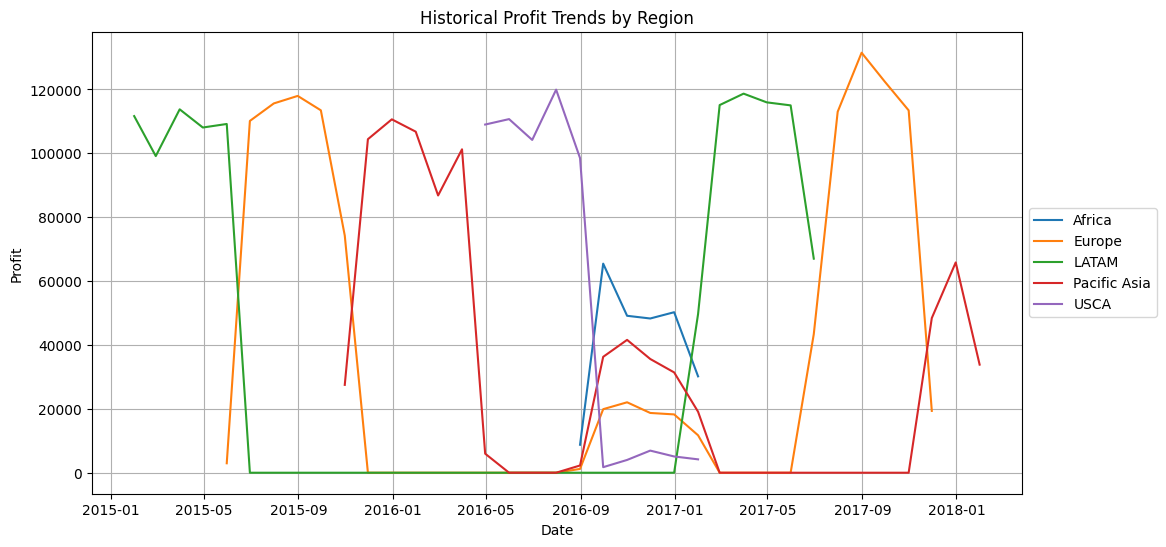

In [25]:
#visualizing the data

fig = plt.figure(figsize=(12, 6))

for market, market_data in Region5_df:
    # Resample the data if needed, e.g., to get monthly profits
    monthly_data = market_data.set_index('order_date_DateOrders')['Order_Profit_Per_Order'].resample('M').sum()

    # Create a time series plot for the region
    plt.plot(monthly_data.index, monthly_data.values, label=market)

plt.title('Historical Profit Trends by Region')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [18]:
#we want to see the trends for 2017 and see which product categories are selling for 2017 before going into 2018 year
products_2017_trends = df[['order_date_DateOrders', 'Order_Profit_Per_Order', 'Category_Name']]

In [19]:
#filtering the data for 2017 only
products_2017_trends = products_2017_trends[products_2017_trends['order_date_DateOrders'].dt.year == 2017]

In [20]:
#grouping the data by product category and summing it by the profit of each order and taking the top 20 largest profits bearing product category
Category_Name_groupby = products_2017_trends.groupby('Category_Name')['Order_Profit_Per_Order'].sum().nlargest(20).sort_values().reset_index()

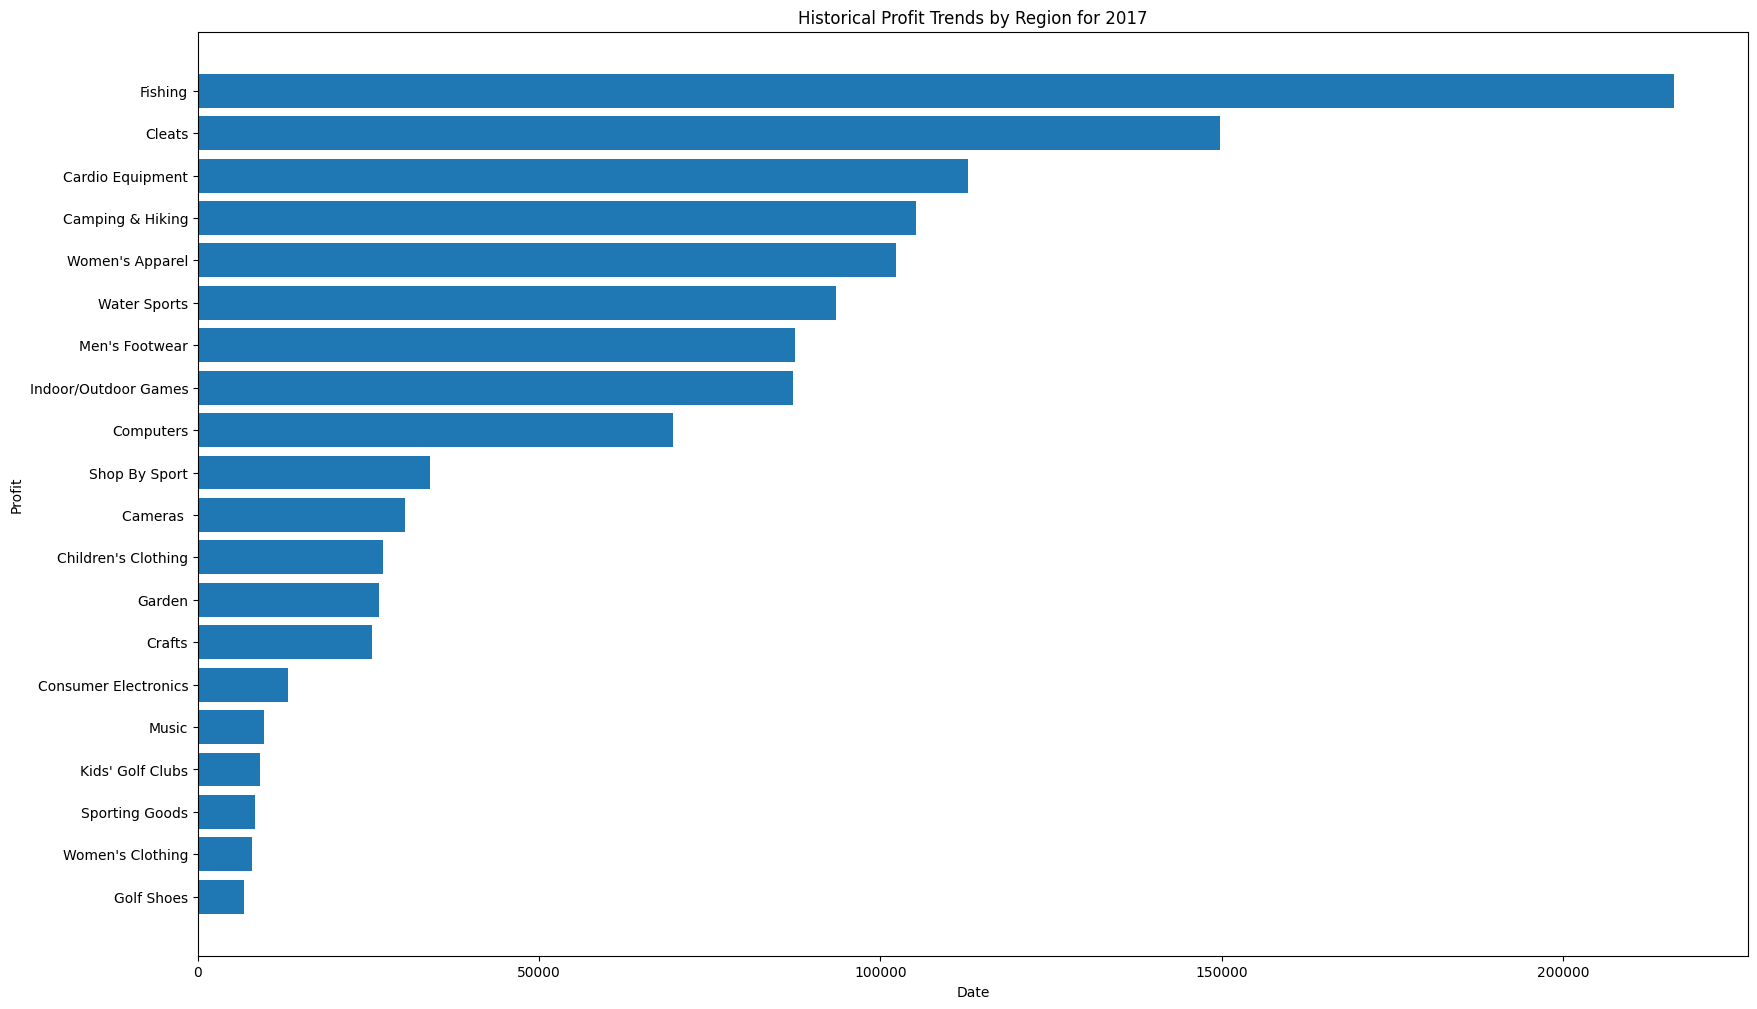

In [217]:
# Create a bar plot to visually perceive the trends for 2017
fig = plt.figure(figsize=(20, 12))

plt.barh(Category_Name_groupby.Category_Name, Category_Name_groupby.Order_Profit_Per_Order)

plt.title('Historical Profit Trends by Region for 2017')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [37]:
# The following codes for the creation of combo products is credited to: https://www.youtube.com/watch?v=eMOA1pPVUc4&si=02xppdCrpnLWKr1h
smart_offer = df[df["Order_Customer_Id"].duplicated(keep= False)]

In [38]:
smart_offer['grouped'] = smart_offer.groupby('Order_Customer_Id')['Product_Name'].transform(lambda x: ',' .join(x))
smart_offer = smart_offer[['Order_Customer_Id', 'grouped']].drop_duplicates()

smart_offer.head(100)

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/768919153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart_offer['grouped'] = smart_offer.groupby('Order_Customer_Id')['Product_Name'].transform(lambda x: ',' .join(x))


,Order_Customer_Id,grouped
0,509,"Nike Men's CJ Elite 2 TD Football Cleat,Field ..."
1,10099,"Nike Men's CJ Elite 2 TD Football Cleat,Diamon..."
3,1146,"Nike Men's CJ Elite 2 TD Football Cleat,Perfec..."
5,597,"Nike Men's CJ Elite 2 TD Football Cleat,Nike M..."
8,3296,"Nike Men's CJ Elite 2 TD Football Cleat,Under ..."
...,...,...
159,2555,"Diamondback Women's Serene Classic Comfort Bi,..."
160,9051,"Nike Men's CJ Elite 2 TD Football Cleat,Nike M..."
161,4093,"Nike Men's Dri-FIT Victory Golf Polo,Nike Men'..."
163,8396,"Nike Men's Dri-FIT Victory Golf Polo,Perfect F..."


In [39]:
#importing essential libraries
from itertools import combinations
from collections import Counter

#creating a class to be able to count the occurences of the pairs
count = Counter()

#iterating through each row in the goruped column and splitting the strings of items with a comma separator. Then we update the overall counter with the counts from the current row.
for row in smart_offer['grouped']:
    product_list = row.split(',')
    count.update(Counter(combinations(product_list,2)))

#converting dictionary into a list of tuples and then converting to a pandas dataframe with a column for pairs and count
df_result = pd.DataFrame(list(count.items()), columns=['Pair', 'Count'])

print(df_result)

                                                   Pair  Count
0     (Nike Men's CJ Elite 2 TD Football Cleat, Fiel...  27762
1     (Nike Men's CJ Elite 2 TD Football Cleat, Peli...  14946
2     (Nike Men's CJ Elite 2 TD Football Cleat, Nike...  24155
3     (Nike Men's CJ Elite 2 TD Football Cleat, Unde...  12279
4     (Nike Men's CJ Elite 2 TD Football Cleat, Perf...  27454
...                                                 ...    ...
5820  (adidas Men's Germany Black Crest Away Tee, Ni...      1
5821  (adidas Youth Germany Black/Red Away Match Soc...      1
5822  (The North Face Women's Recon Backpack, Titlei...      1
5823  (Garmin Forerunner 910XT GPS Watch, Team Golf ...      1
5824  (Garmin Approach S3 Golf GPS Watch, GolfBuddy ...      1

[5825 rows x 2 columns]


In [40]:
#filtering by the top10 largest count of orders made
top10_prod_combo = df_result.nlargest(10,'Count')

top10_prod_combo

,Pair,Count
34,"(Perfect Fitness Perfect Rip Deck, O'Brien Men...",32573
6,"(Nike Men's CJ Elite 2 TD Football Cleat, O'Br...",30663
87,"(Perfect Fitness Perfect Rip Deck, Perfect Fit...",28867
66,"(Perfect Fitness Perfect Rip Deck, Field & Str...",28651
24,"(Nike Men's Dri-FIT Victory Golf Polo, O'Brien...",28337
0,"(Nike Men's CJ Elite 2 TD Football Cleat, Fiel...",27762
4,"(Nike Men's CJ Elite 2 TD Football Cleat, Perf...",27454
19,"(Pelican Sunstream 100 Kayak, O'Brien Men's Ne...",26309
22,"(Nike Men's Dri-FIT Victory Golf Polo, Perfect...",24680
78,"(Nike Men's Dri-FIT Victory Golf Polo, Field &...",24638


In [42]:
#converting tuple into a string form for every row in the Pair column

#creating a list variable to be able to store the converted string pair in a list to then put it back in the Pair column of the top10_prod_combo df
Pair_list = list()

#accessing the tuple
for pair_tuple in top10_prod_combo['Pair']:
    #accesing the elements in the tuple
    product1, product2 = pair_tuple
    #converting the pair into a string form
    string_pair = f'{product1}, {product2}'
    Pair_list.append(string_pair)
    #chekcing the transformed data
    #print(string_pair)

#chekcing the data in the list    
print(Pair_list)

["Perfect Fitness Perfect Rip Deck, O'Brien Men's Neoprene Life Vest", "Nike Men's CJ Elite 2 TD Football Cleat, O'Brien Men's Neoprene Life Vest", 'Perfect Fitness Perfect Rip Deck, Perfect Fitness Perfect Rip Deck', 'Perfect Fitness Perfect Rip Deck, Field & Stream Sportsman 16 Gun Fire Safe', "Nike Men's Dri-FIT Victory Golf Polo, O'Brien Men's Neoprene Life Vest", "Nike Men's CJ Elite 2 TD Football Cleat, Field & Stream Sportsman 16 Gun Fire Safe", "Nike Men's CJ Elite 2 TD Football Cleat, Perfect Fitness Perfect Rip Deck", "Pelican Sunstream 100 Kayak, O'Brien Men's Neoprene Life Vest", "Nike Men's Dri-FIT Victory Golf Polo, Perfect Fitness Perfect Rip Deck", "Nike Men's Dri-FIT Victory Golf Polo, Field & Stream Sportsman 16 Gun Fire Safe"]


In [43]:
#putting the converted pairs into the Pair column

# Append the list containing the pair in list form to the 'Pair' column
top10_prod_combo['Pair'] = Pair_list

top10_prod_combo


,Pair,Count
34,"Perfect Fitness Perfect Rip Deck, O'Brien Men'...",32573
6,"Nike Men's CJ Elite 2 TD Football Cleat, O'Bri...",30663
87,"Perfect Fitness Perfect Rip Deck, Perfect Fitn...",28867
66,"Perfect Fitness Perfect Rip Deck, Field & Stre...",28651
24,"Nike Men's Dri-FIT Victory Golf Polo, O'Brien ...",28337
0,"Nike Men's CJ Elite 2 TD Football Cleat, Field...",27762
4,"Nike Men's CJ Elite 2 TD Football Cleat, Perfe...",27454
19,"Pelican Sunstream 100 Kayak, O'Brien Men's Neo...",26309
22,"Nike Men's Dri-FIT Victory Golf Polo, Perfect ...",24680
78,"Nike Men's Dri-FIT Victory Golf Polo, Field & ...",24638


Text(0.5, 1.0, 'Top 10 Product Pairs Frequently Sold Based on Count')

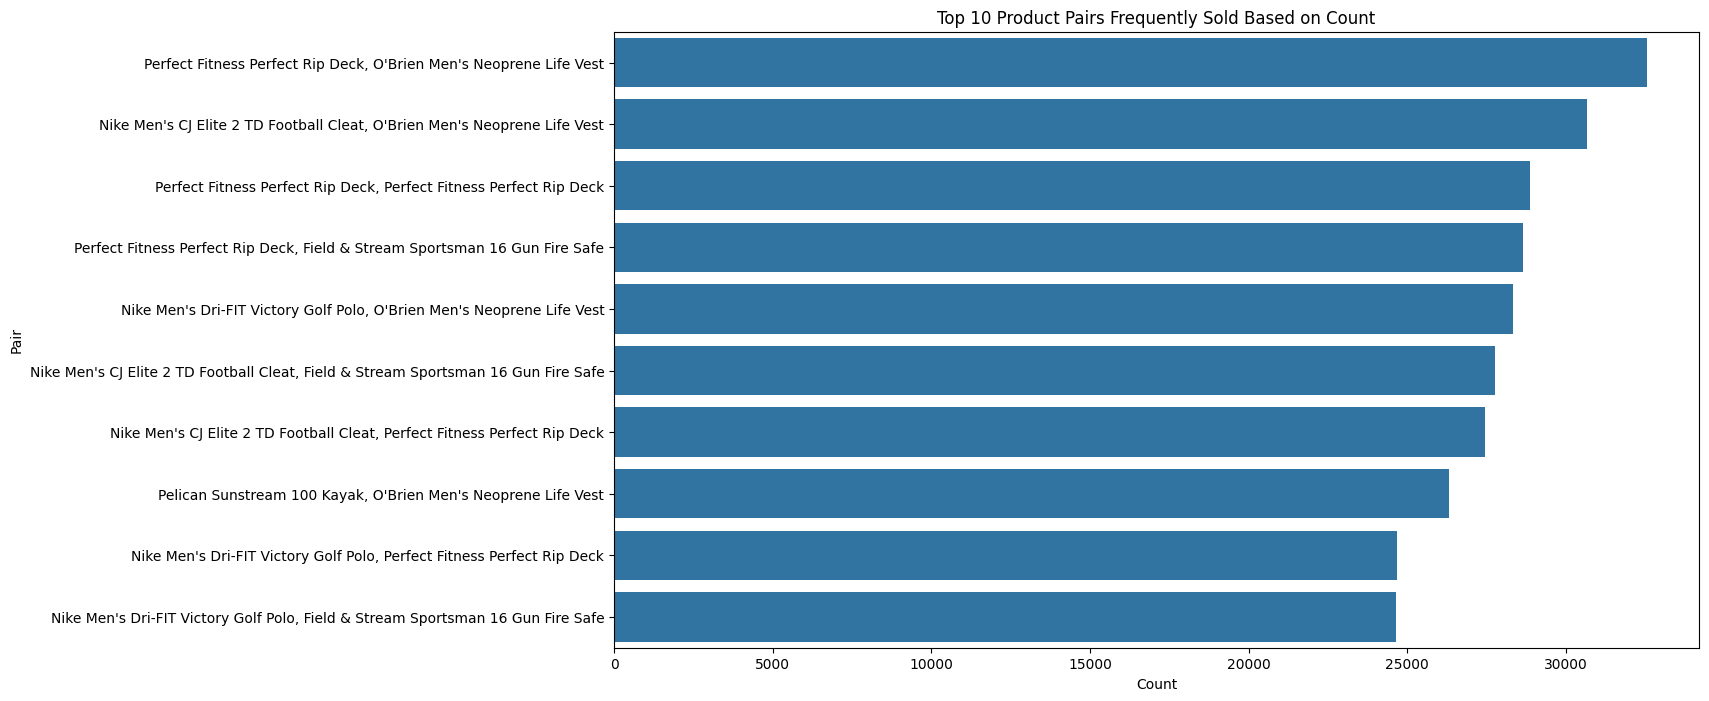

In [44]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x='Count', y= 'Pair', data= top10_prod_combo)
plt.xlabel('Count')
plt.title('Top 10 Product Pairs Frequently Sold Based on Count')

In [45]:
#we want to know what are the best time to advertise our products
marketing_df = df[['Order_Customer_Id', 'order_date_DateOrders']]

In [46]:
#extracting the relavent times in the time stamp
marketing_df["year"] = marketing_df['order_date_DateOrders'].dt.year

marketing_df["month"] = marketing_df['order_date_DateOrders'].dt.month_name()

marketing_df['day'] = marketing_df['order_date_DateOrders'].dt.day_name()

marketing_df["hour"] = marketing_df['order_date_DateOrders'].dt.hour

marketing_df

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/4100601337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df["year"] = marketing_df['order_date_DateOrders'].dt.year
/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/4100601337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df["month"] = marketing_df['order_date_DateOrders'].dt.month_name()
/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/4100601337.py:6: SettingWithCopyWarning: 
A val

,Order_Customer_Id,order_date_DateOrders,year,month,day,hour
0,509,2017-06-18 21:20:00,2017,June,Sunday,21
1,10099,2015-10-01 11:42:00,2015,October,Thursday,11
2,10099,2015-10-01 11:42:00,2015,October,Thursday,11
3,1146,2017-06-25 02:14:00,2017,June,Sunday,2
4,10099,2015-10-01 11:42:00,2015,October,Thursday,11
...,...,...,...,...,...,...
180514,10711,2016-01-18 00:31:00,2016,January,Monday,0
180515,5424,2016-01-16 15:14:00,2016,January,Saturday,15
180516,5424,2016-01-16 15:14:00,2016,January,Saturday,15
180517,5424,2016-01-16 15:14:00,2016,January,Saturday,15


In [48]:
#grouping the data and doing a value count of the order customer ids for each attribute (year, month, day, and hour)
marketing_yeargroupby = marketing_df.groupby('year')['Order_Customer_Id'].value_counts().reset_index()

marketing_monthgroupby = marketing_df.groupby('month')['Order_Customer_Id'].value_counts().reset_index()

marketing_daygroupby = marketing_df.groupby('day')['Order_Customer_Id'].value_counts().reset_index()

marketing_hourgroupby = marketing_df.groupby('hour')['Order_Customer_Id'].value_counts().reset_index()

In [49]:
#creating a groupby that sums all of the orders by year, month, day, and hour
marketing_yeargroupby = marketing_yeargroupby.groupby('year')['count'].sum().reset_index()

marketing_monthgroupby = marketing_monthgroupby.groupby('month')['count'].sum().reset_index()

marketing_daygroupby = marketing_daygroupby.groupby('day')['count'].sum().reset_index()

marketing_hourgroupby = marketing_hourgroupby.groupby('hour')['count'].sum().reset_index()

In [50]:
#Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Reorder the categories based on the custom order
marketing_monthgroupby['month'] = pd.Categorical(marketing_monthgroupby['month'], categories=month_order, ordered=True)
 
#Sort the DataFrame by the custom order of days
marketing_monthgroupby = marketing_monthgroupby.sort_values(by='month', ignore_index=True)

print(marketing_monthgroupby)

#Doing the same process for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

marketing_daygroupby['day'] = pd.Categorical(marketing_daygroupby['day'], categories=day_order, ordered=True)

marketing_daygroupby = marketing_daygroupby.sort_values(by='day', ignore_index=True)

print(marketing_daygroupby)



        month  count
0     January  17979
1    February  14529
2       March  15919
3       April  15435
4         May  15976
5        June  15139
6        July  15922
7      August  15912
8   September  15489
9     October  12955
10   November  12500
11   December  12764
         day  count
0     Monday  25786
1    Tuesday  25622
2  Wednesday  25587
3   Thursday  25752
4     Friday  25925
5   Saturday  25901
6     Sunday  25946


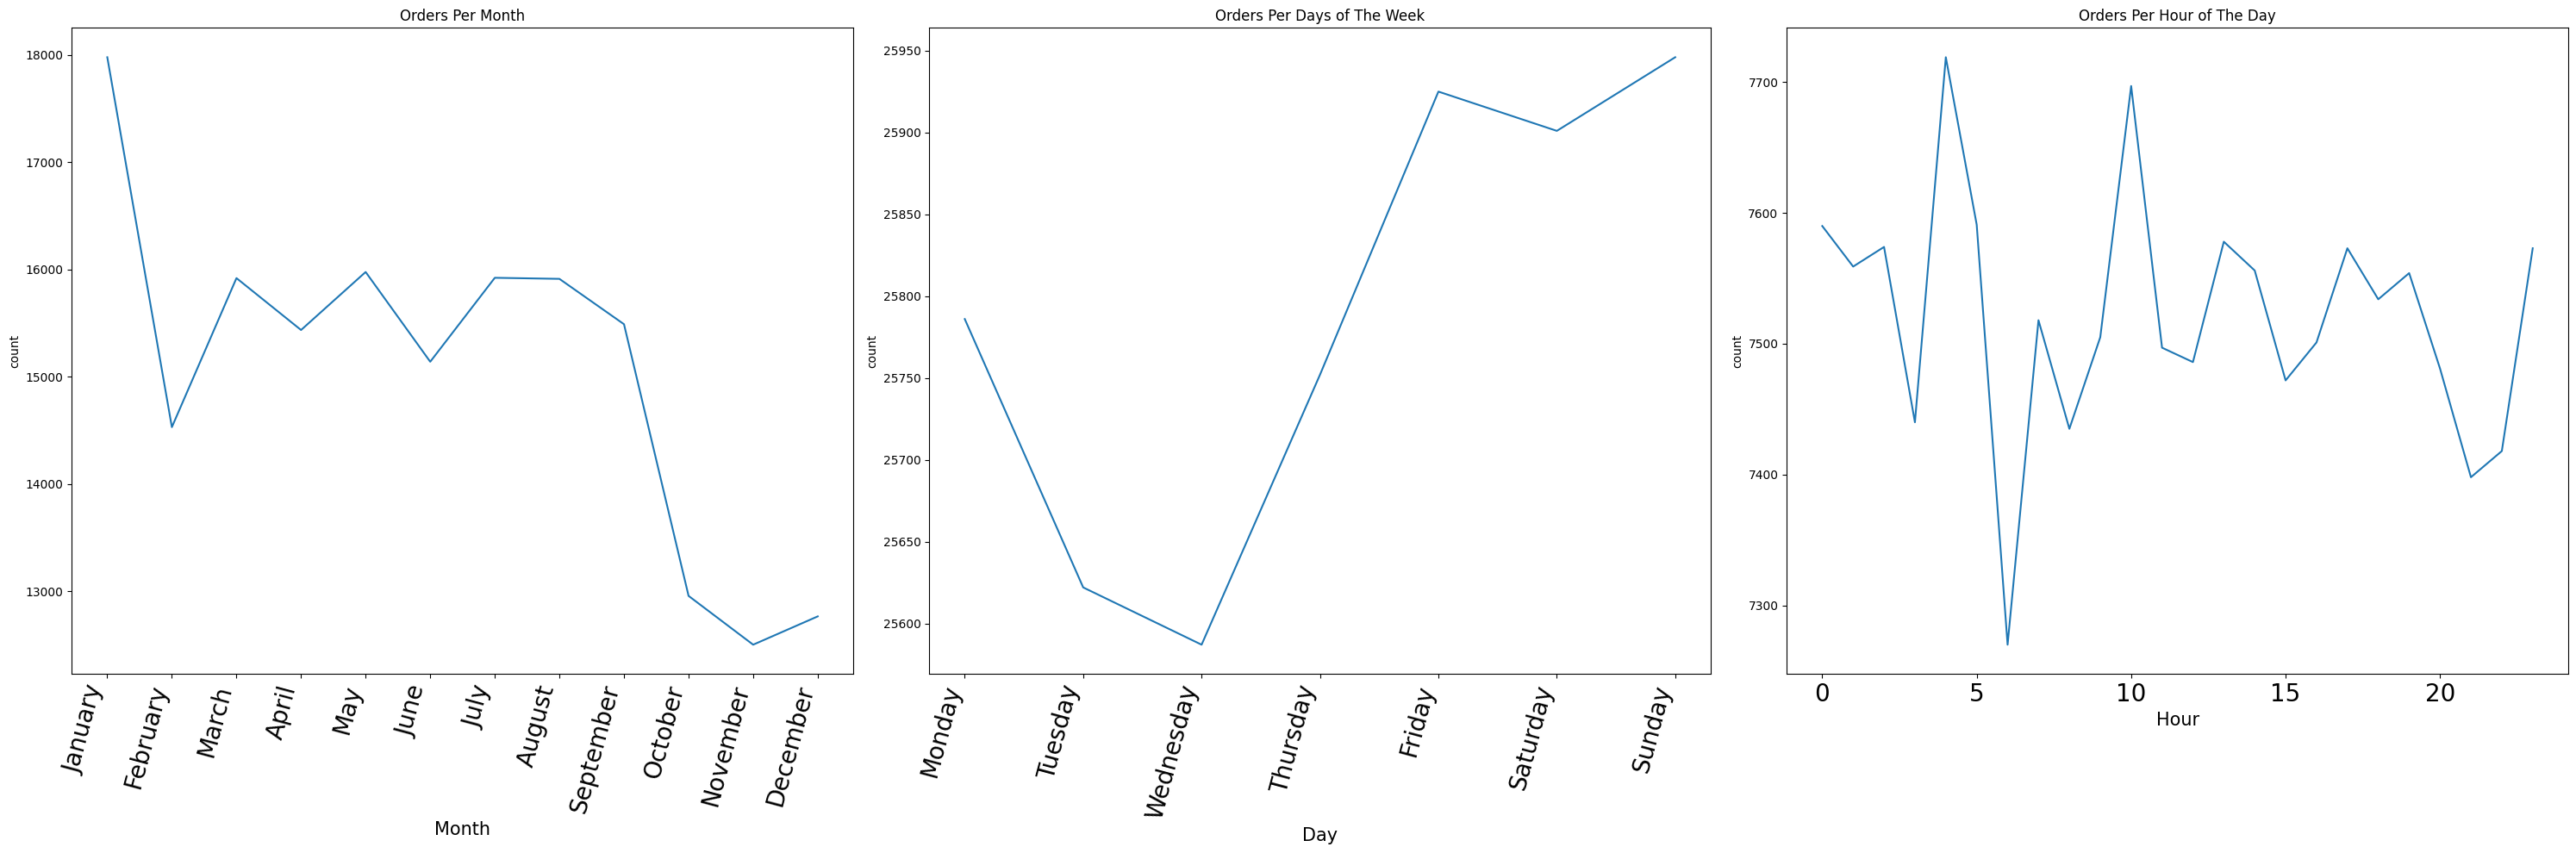

In [51]:
#visualizing
plt.figure(figsize=(30, 10))

#subplot for months
plt.subplot(1,3,1)
sns.lineplot(x= marketing_monthgroupby.month, y= 'count', data= marketing_monthgroupby)
plt.xlabel('Month', fontsize= 15)
plt.xticks(rotation = 75, ha='right', fontsize= 20)
plt.title('Orders Per Month')

#subplot for day
plt.subplot(1,3,2)
sns.lineplot(x= marketing_daygroupby.day, y= 'count', data= marketing_daygroupby)
plt.xlabel('Day',fontsize= 15)
plt.xticks(rotation = 75, ha='right', fontsize= 20)
plt.title('Orders Per Days of The Week')

#subplot for hour
plt.subplot(1,3,3)
sns.lineplot(x= marketing_hourgroupby.hour, y= 'count', data= marketing_hourgroupby)
plt.xticks(fontsize= 20)
plt.xlabel('Hour', fontsize= 15)
plt.title('Orders Per Hour of The Day')

plt.tight_layout()
plt.show()

In [83]:
#creating a list variable to be able to store the converted string pair in a list to then put it back in the Pair column of the top10_prod_combo df
product_list = list()

#accessing the tuple
for pair_tuple in top10_prod_combo['Pair']:
    #splitting the tuple into two elements
    products = pair_tuple.split(',')
    #accesing the elements
    for product in products:
        #eleminating white spaces to the left of the string
        lstrp_prod = product.lstrip()
        #appending the words to the variable that was assigned a list
        product_list.append(lstrp_prod)

print(product_list)

['Perfect Fitness Perfect Rip Deck', "O'Brien Men's Neoprene Life Vest", "Nike Men's CJ Elite 2 TD Football Cleat", "O'Brien Men's Neoprene Life Vest", 'Perfect Fitness Perfect Rip Deck', 'Perfect Fitness Perfect Rip Deck', 'Perfect Fitness Perfect Rip Deck', 'Field & Stream Sportsman 16 Gun Fire Safe', "Nike Men's Dri-FIT Victory Golf Polo", "O'Brien Men's Neoprene Life Vest", "Nike Men's CJ Elite 2 TD Football Cleat", 'Field & Stream Sportsman 16 Gun Fire Safe', "Nike Men's CJ Elite 2 TD Football Cleat", 'Perfect Fitness Perfect Rip Deck', 'Pelican Sunstream 100 Kayak', "O'Brien Men's Neoprene Life Vest", "Nike Men's Dri-FIT Victory Golf Polo", 'Perfect Fitness Perfect Rip Deck', "Nike Men's Dri-FIT Victory Golf Polo", 'Field & Stream Sportsman 16 Gun Fire Safe']


In [84]:
#creating data frame in order to do a market analysis of the different places of where the product within the combos are selling the most
market_analysis_T10combo_df = df[['Order_Customer_Id', 'Market', 'Order_City', 'Order_State', 'Order_Country', 'Product_Name', 'Order_Item_Profit_Ratio']]

In [85]:
#filtereing the dataframe by the ptop 10 product list in the combo dataframe
filt_market_analysis_T10combo_df = market_analysis_T10combo_df[market_analysis_T10combo_df['Product_Name'].isin(product_list)]

In [86]:
#filtering the dataset by the top two markets with the most demand of the product
region_list = ['LATAM', 'Europe']
filt_state_groupby_combo = filt_market_analysis_T10combo_df[market_analysis_T10combo_df['Market'].isin(region_list)]

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/1212726363.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_state_groupby_combo = filt_market_analysis_T10combo_df[market_analysis_T10combo_df['Market'].isin(region_list)]


In [87]:
#filtering the data by the top 5 states with the most in demand for the top 10 combo products
state_list = ['Inglaterra', 'Isla de Francia', 'San Salvador','Renania del Norte-Westfalia', 'Distrito Federal']
filt_city_groupby_combo = filt_market_analysis_T10combo_df[market_analysis_T10combo_df['Order_State'].isin(state_list)]

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/147151357.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_city_groupby_combo = filt_market_analysis_T10combo_df[market_analysis_T10combo_df['Order_State'].isin(state_list)]


In [88]:
#getting value count in order to get how many orders where made for each place (Martket, State, and City)
market_groupby_combo = filt_market_analysis_T10combo_df.groupby('Market')['Order_Customer_Id'].value_counts().reset_index()

state_groupby_combo = filt_state_groupby_combo.groupby('Order_State')['Order_Customer_Id'].value_counts().reset_index()

city_groupby_combo = filt_city_groupby_combo.groupby('Order_City')['Order_Customer_Id'].value_counts().reset_index()

In [91]:
#grouping everything and summing up the order counts for each respective place
market_groupby_combo = market_groupby_combo.groupby('Market')['count'].sum().sort_values().reset_index()

state_groupby_combo = state_groupby_combo.groupby('Order_State')['count'].sum().nlargest(5).sort_values().reset_index()

city_groupby_combo = city_groupby_combo.groupby('Order_City')['count'].sum().nlargest(10).sort_values().reset_index()

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/2752483875.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(market_groupby_combo['Market'], fontsize= 16)
/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/2752483875.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(state_groupby_combo['Order_State'], fontsize= 16)
/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_2147/2752483875.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(city_groupby_combo['Order_City'], fontsize= 16)


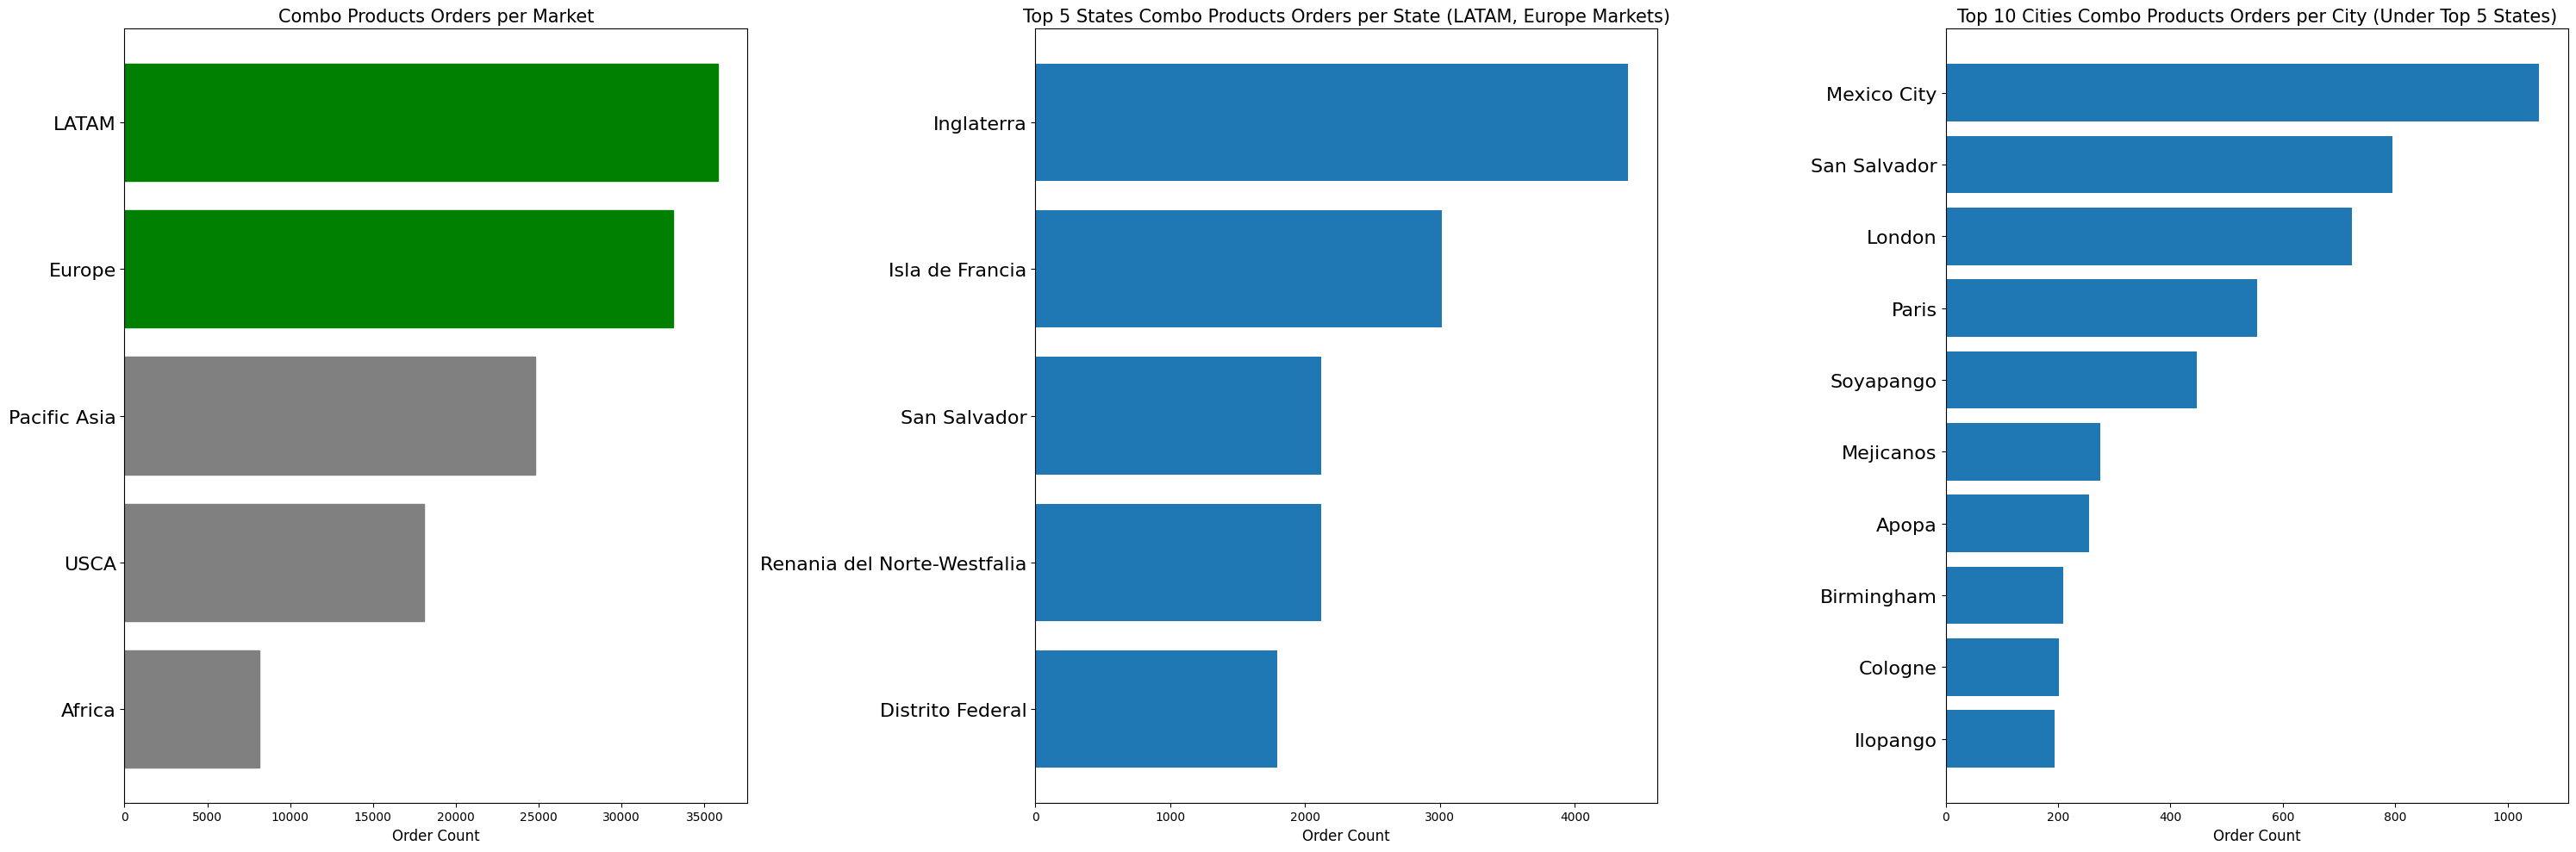

In [97]:
#visualizing
fig, axes = plt.subplots(1,3,figsize = (30, 10))

#subplot for months
ax = axes[0]
barplot1 = ax.barh(market_groupby_combo['Market'], market_groupby_combo['count'])

market_top_10 = market_groupby_combo.nlargest(2, 'count').index.to_list()

for i, bar in enumerate(barplot1):
    if market_groupby_combo.index[i] in market_top_10:
        bar.set_color('green')
    else: 
        bar.set_color('grey')

ax.set_xlabel('Order Count', fontsize = 12)
ax.set_yticklabels(market_groupby_combo['Market'], fontsize= 16)
ax.set_title('Combo Products Orders per Market', fontsize= 15)

#subplot for day
ax = axes[1]
ax.barh(state_groupby_combo['Order_State'], state_groupby_combo['count'])
ax.set_xlabel('Order Count', fontsize = 12)
ax.set_yticklabels(state_groupby_combo['Order_State'], fontsize= 16)
ax.set_title('Top 5 States Combo Products Orders per State (LATAM, Europe Markets)', fontsize= 15)

#subplot for hour
ax = axes[2]
ax.barh(city_groupby_combo['Order_City'], city_groupby_combo['count'], data= city_groupby_combo)
ax.set_xlabel('Order Count', fontsize = 12)
ax.set_yticklabels(city_groupby_combo['Order_City'], fontsize= 16)
ax.set_title('Top 10 Cities Combo Products Orders per City (Under Top 5 States)', fontsize= 15)

plt.tight_layout()
plt.show()

In [98]:
#creating a data frame to derive how should we price these combo products
pricing_df = df[['Order_Customer_Id', 'Product_Name', 'Order_Item_Discount_Rate', 'Order_Item_Product_Price', 'Order_Item_Quantity', 'Order_Item_Profit_Ratio']]

In [99]:
#filtereing the dataframe by the products that are in the list that we extracted from the combo
pricing_df = pricing_df[pricing_df['Product_Name'].isin(product_list)]

In [100]:
#calculating the effective price of each item that was sold
pricing_df['effective_price'] = pricing_df['Order_Item_Product_Price'] * (1 - pricing_df['Order_Item_Discount_Rate'])

pricing_df

,Order_Customer_Id,Product_Name,Order_Item_Discount_Rate,Order_Item_Product_Price,Order_Item_Quantity,Order_Item_Profit_Ratio,effective_price
0,509,Nike Men's CJ Elite 2 TD Football Cleat,0.12,129.990005,1,0.17,114.391205
1,10099,Nike Men's CJ Elite 2 TD Football Cleat,0.15,129.990005,1,0.34,110.491504
3,1146,Nike Men's CJ Elite 2 TD Football Cleat,0.16,129.990005,1,0.34,109.191605
4,10099,Nike Men's CJ Elite 2 TD Football Cleat,0.16,129.990005,1,0.45,109.191605
5,597,Nike Men's CJ Elite 2 TD Football Cleat,0.03,129.990005,1,0.27,126.090305
...,...,...,...,...,...,...,...
180514,10711,Field & Stream Sportsman 16 Gun Fire Safe,0.00,399.980011,1,0.34,399.980011
180515,5424,Field & Stream Sportsman 16 Gun Fire Safe,0.05,399.980011,1,0.11,379.981010
180516,5424,Field & Stream Sportsman 16 Gun Fire Safe,0.06,399.980011,1,0.06,375.981211
180517,5424,Field & Stream Sportsman 16 Gun Fire Safe,0.07,399.980011,1,0.34,371.981410


In [101]:
#getting the average effective price of each product in the top 10 combo
pricing_products_df = pricing_df.groupby('Product_Name')['effective_price'].mean().sort_values(ascending= False).round(2).reset_index()

pricing_products_df

,Product_Name,effective_price
0,Field & Stream Sportsman 16 Gun Fire Safe,359.31
1,Pelican Sunstream 100 Kayak,179.66
2,Nike Men's CJ Elite 2 TD Football Cleat,116.77
3,Perfect Fitness Perfect Rip Deck,53.90
4,Nike Men's Dri-FIT Victory Golf Polo,44.92
5,O'Brien Men's Neoprene Life Vest,44.91


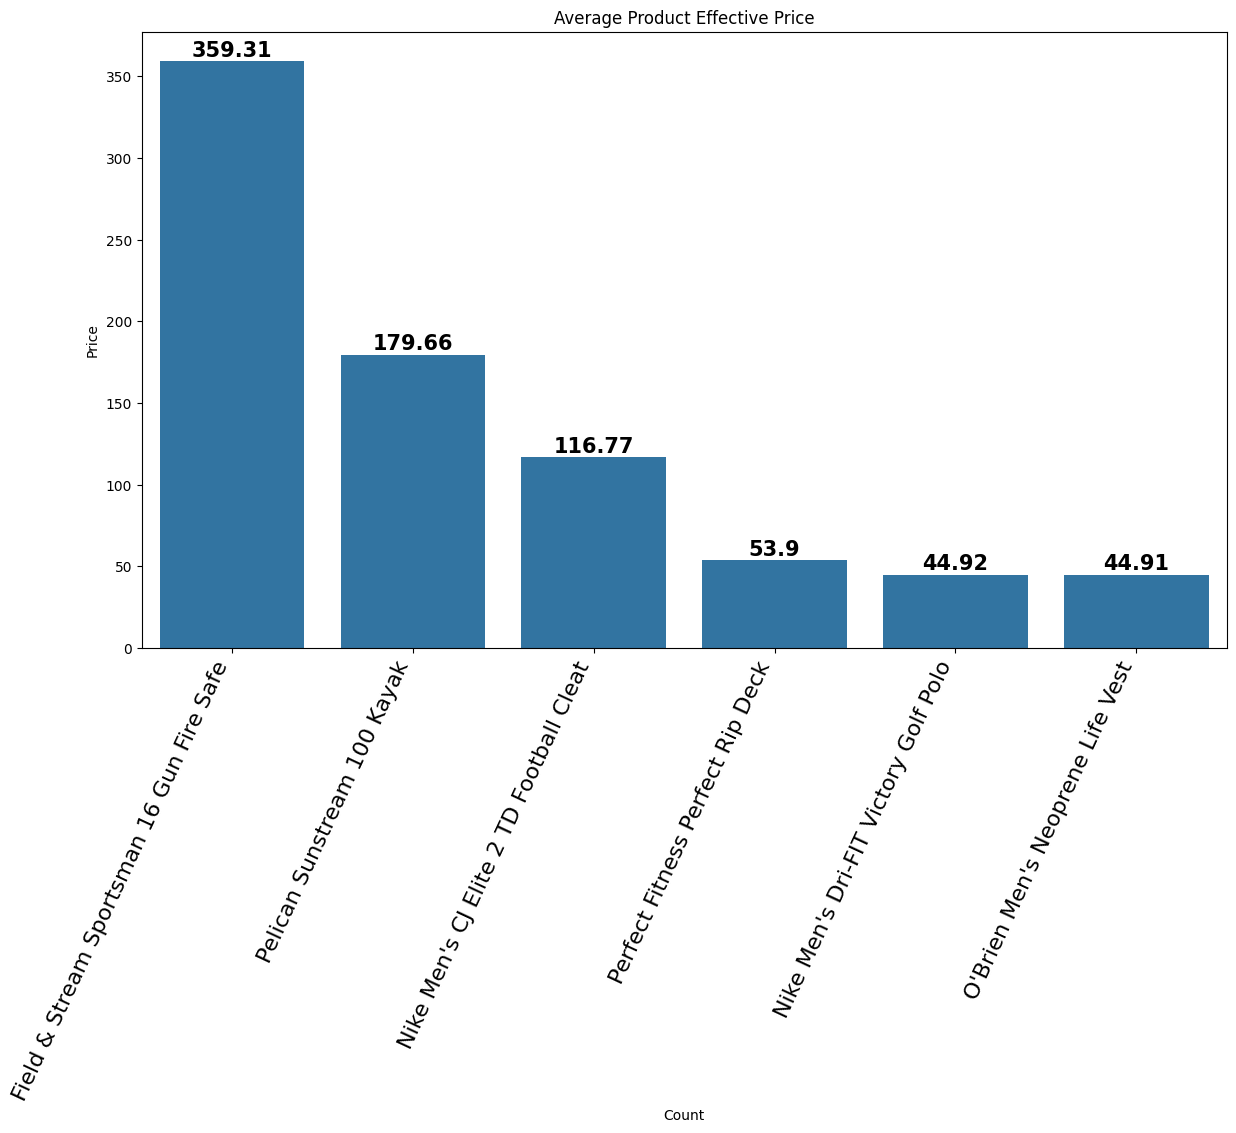

In [102]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x='Product_Name', y= 'effective_price', data= pricing_products_df)

for i, value in enumerate(pricing_products_df['effective_price']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold', fontsize= 15)

plt.xlabel('Count')
plt.xticks(rotation = 65, ha='right', fontsize= 16)
plt.ylabel('Price')
plt.title('Average Product Effective Price')
plt.show()

In [118]:
#creating a new variable with a dataframe that has the Product_Name column as the index in order to use the .loc feature better
pricing_products__prodindx_df = pricing_products_df.set_index('Product_Name')

pricing_products__prodindx_df

,effective_price
Product_Name,
Field & Stream Sportsman 16 Gun Fire Safe,359.31
Pelican Sunstream 100 Kayak,179.66
Nike Men's CJ Elite 2 TD Football Cleat,116.77
Perfect Fitness Perfect Rip Deck,53.90
Nike Men's Dri-FIT Victory Golf Polo,44.92
O'Brien Men's Neoprene Life Vest,44.91


In [119]:
#creating a dictionary with the set columns with lists in order to prepare for storing of the data
product_dict = {'Pair': [], 'Price': []}

#accessing the tuple from the top10_prod_combo dataframe
for pair_tuple in top10_prod_combo['Pair']:

    #splitting the tuple by the commas
    product1, product2 = pair_tuple.split(',')
    #eliminating the white space to the left of the strings in order to better find the match of strings within our dataframe that contains the pricing of the respective products
    product2l = product2.lstrip()
    
    #creating a variable that stores the name of the combo of the products
    product_combo = f"{product1}, {product2l}"
    #creating a variable that will store the respective sumed pricing of the combo of products
    price_sum = pricing_products__prodindx_df.loc[product1, 'effective_price'] + pricing_products__prodindx_df.loc[product2l, 'effective_price']
   
    #appending the combo of the products and sum of pricing to the respective columns in the dictionary
    product_dict['Pair'].append(product_combo)
    product_dict['Price'].append(price_sum)
    #product_dict.append(f"{product1}, {product2l}: [{pricing_products__prodindx_df.loc[product1, 'effective_price'] + pricing_products__prodindx_df.loc[product2l, 'effective_price']}]")

In [120]:
#converting the dictionary into a dataframe
combo_prod_price_df = pd.DataFrame(product_dict)

#merging both tables dataframes into one in order to develop the profits per product combo
profits_per_combo = pd.merge(combo_prod_price_df, top10_prod_combo, how = 'inner', on= 'Pair')

profits_per_combo

,Pair,Price,Count
0,"Perfect Fitness Perfect Rip Deck, O'Brien Men'...",98.81,32573
1,"Nike Men's CJ Elite 2 TD Football Cleat, O'Bri...",161.68,30663
2,"Perfect Fitness Perfect Rip Deck, Perfect Fitn...",107.80,28867
3,"Perfect Fitness Perfect Rip Deck, Field & Stre...",413.21,28651
4,"Nike Men's Dri-FIT Victory Golf Polo, O'Brien ...",89.83,28337
5,"Nike Men's CJ Elite 2 TD Football Cleat, Field...",476.08,27762
6,"Nike Men's CJ Elite 2 TD Football Cleat, Perfe...",170.67,27454
7,"Pelican Sunstream 100 Kayak, O'Brien Men's Neo...",224.57,26309
8,"Nike Men's Dri-FIT Victory Golf Polo, Perfect ...",98.82,24680
9,"Nike Men's Dri-FIT Victory Golf Polo, Field & ...",404.23,24638


In [121]:
#calculating the profits for every combo
profits_per_combo['profits_per_combo'] = profits_per_combo['Price'] * profits_per_combo['Count']

#sorting the values in order to better visualize it in the bar graph
profits_per_combo.sort_values(by= 'profits_per_combo', ascending= False, inplace= True)

In [127]:
#calculating the total profits that could be made from this combo marketing strategy
total_profits = round(profits_per_combo['profits_per_combo'].sum() / 3,2)

In [128]:
#credit: https://stackoverflow.com/questions/320929/currency-formatting-in-python
#importing library
import locale

#setting the format to local location currency format
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

#conversion from regualar number to currency
currency_format = locale.currency(total_profits, grouping=True )

currency_format

'$20,627,134.20'

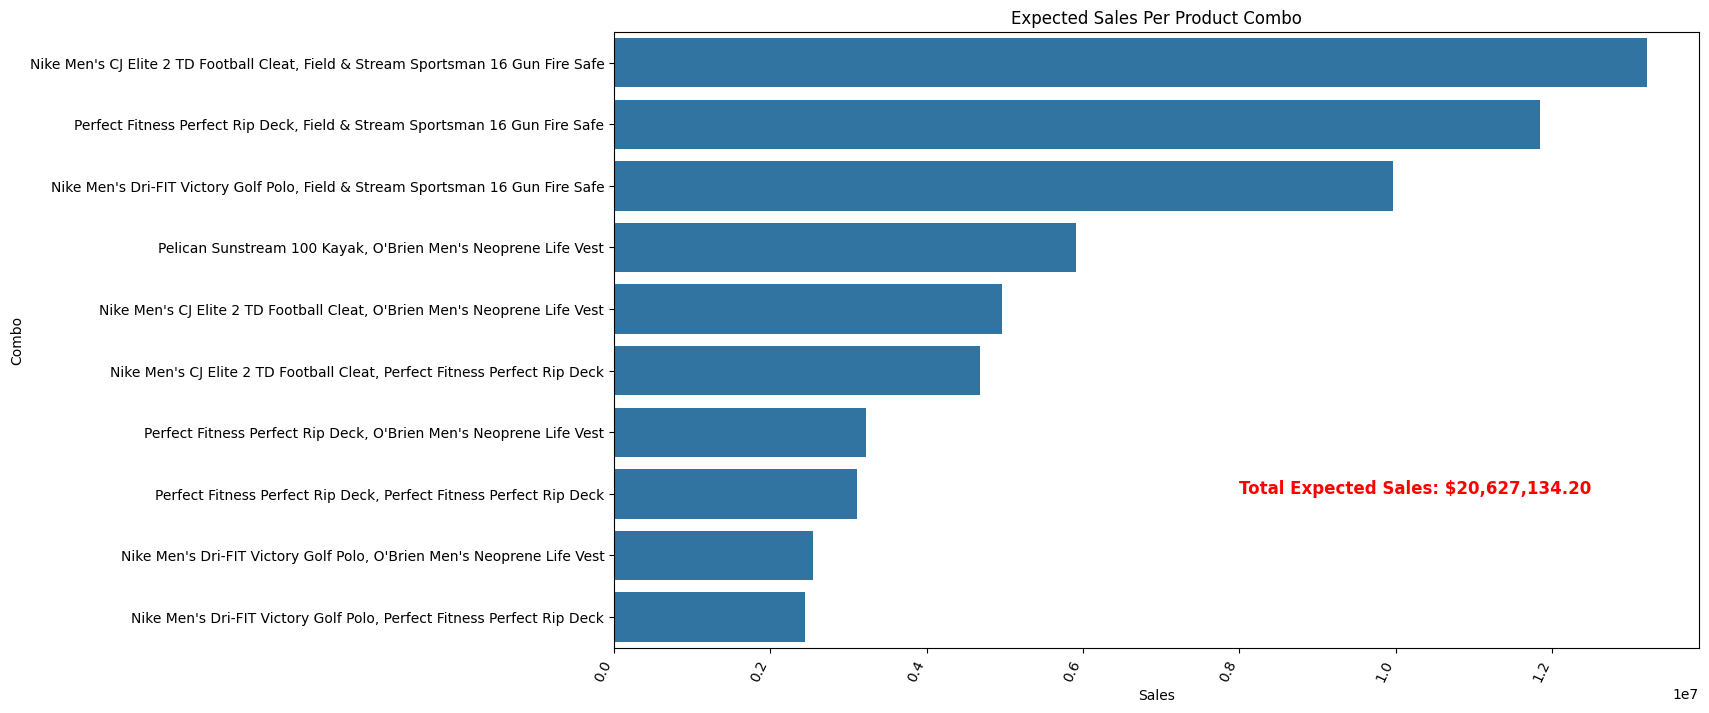

In [129]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x='profits_per_combo', y= 'Pair', data= profits_per_combo)
plt.xlabel('Sales')
plt.xticks(rotation = 65, ha='right')
plt.ylabel('Combo')
plt.title('Expected Sales Per Product Combo')

plt.text(8000000, 7, f'Total Expected Sales: {currency_format}', fontsize=12, fontweight='bold', color='red')

plt.show()

##Shipping Optimization

In [109]:
#extracting date of orders, market and delviery status data to understand our delivery statuses performance
shipping__statuses = df[['order_date_DateOrders', 'Delivery_Status', 'Market']]

In [110]:
#grouping by delvery satatus and creating a new column with the count of orders under those delivery statuses
shipping__statuses = shipping__statuses.groupby('Delivery_Status')['order_date_DateOrders'].value_counts().reset_index(name= 'Order_Count')

In [111]:
#grouping by delivery status and summing up the number of orders for those delivery statuses. im also sorting in an ascending fassion in order to better visualize the data better
shipping__statuses = shipping__statuses.groupby('Delivery_Status')['Order_Count'].sum().sort_values(ascending= False).reset_index()

In [112]:
#setting the delivery satus as the index
shipping__statuses.set_index('Delivery_Status', inplace= True)

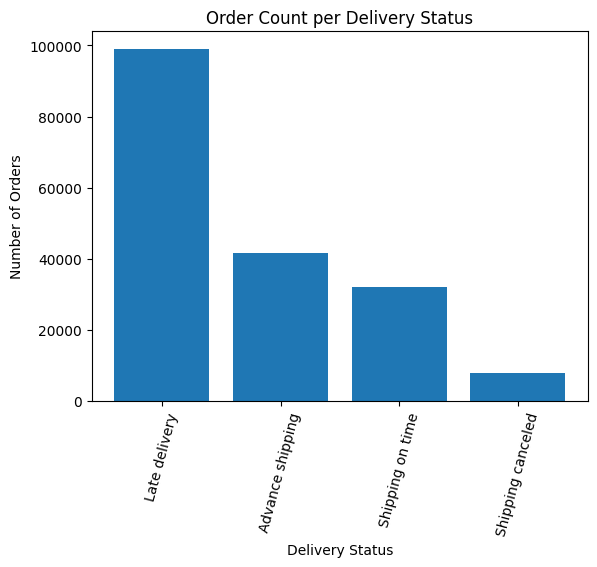

In [113]:
plt.bar(shipping__statuses.index, shipping__statuses.Order_Count)
plt.xticks(rotation=75)
plt.title('Order Count per Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.show()

In [10]:
#setting dataframe to calculate the days late of shipment distribution
shipping_delays = df[['Order_Customer_Id', 'Delivery_Status', 'Shipping_Mode', 'Days_for_shipping_real', 'Days_for_shipment_scheduled', 'Order_City', 'Order_Country', 'Order_Region', "Product_Name"]]

In [11]:
shipping_delays['days'] = shipping_delays['Days_for_shipping_real'] - shipping_delays['Days_for_shipment_scheduled']

/var/folders/sm/0p9xlw3950bcl1jg6rphjx540000gn/T/ipykernel_66573/1118680823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_delays['days'] = shipping_delays['Days_for_shipping_real'] - shipping_delays['Days_for_shipment_scheduled']


In [197]:
shipping_delays_day_dist = shipping_delays.groupby('days')['Order_Customer_Id'].value_counts().reset_index()

In [198]:
shipping_delays_day_dist = shipping_delays_day_dist.groupby('days')['count'].sum().reset_index()

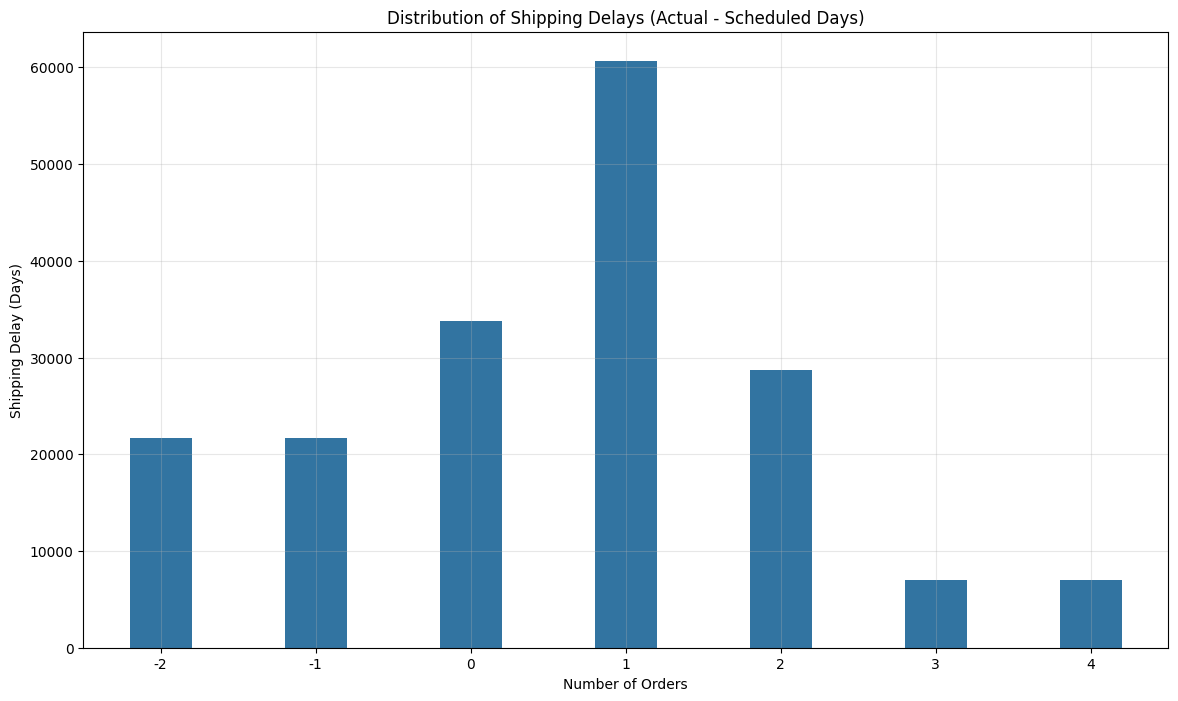

In [199]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x= 'days' , y= 'count', data= shipping_delays_day_dist, width=0.4)
plt.xlabel('Number of Orders')
plt.ylabel('Shipping Delay (Days)')
plt.title('Distribution of Shipping Delays (Actual - Scheduled Days)')
plt.grid(alpha=0.3)
plt.show()

In [175]:
shipping_delays_average_region = shipping_delays.groupby('Order_Region')['days'].mean().sort_values(ascending= False).reset_index()

shipping_delays_average_region

,Order_Region,days
0,Central Asia,0.645570
1,Central Africa,0.639833
2,South Asia,0.597465
3,Western Europe,0.597403
4,US Center,0.587226
5,East of USA,0.584816
6,South of USA,0.579975
7,Eastern Europe,0.579847
8,East Africa,0.570734
9,West Asia,0.569479


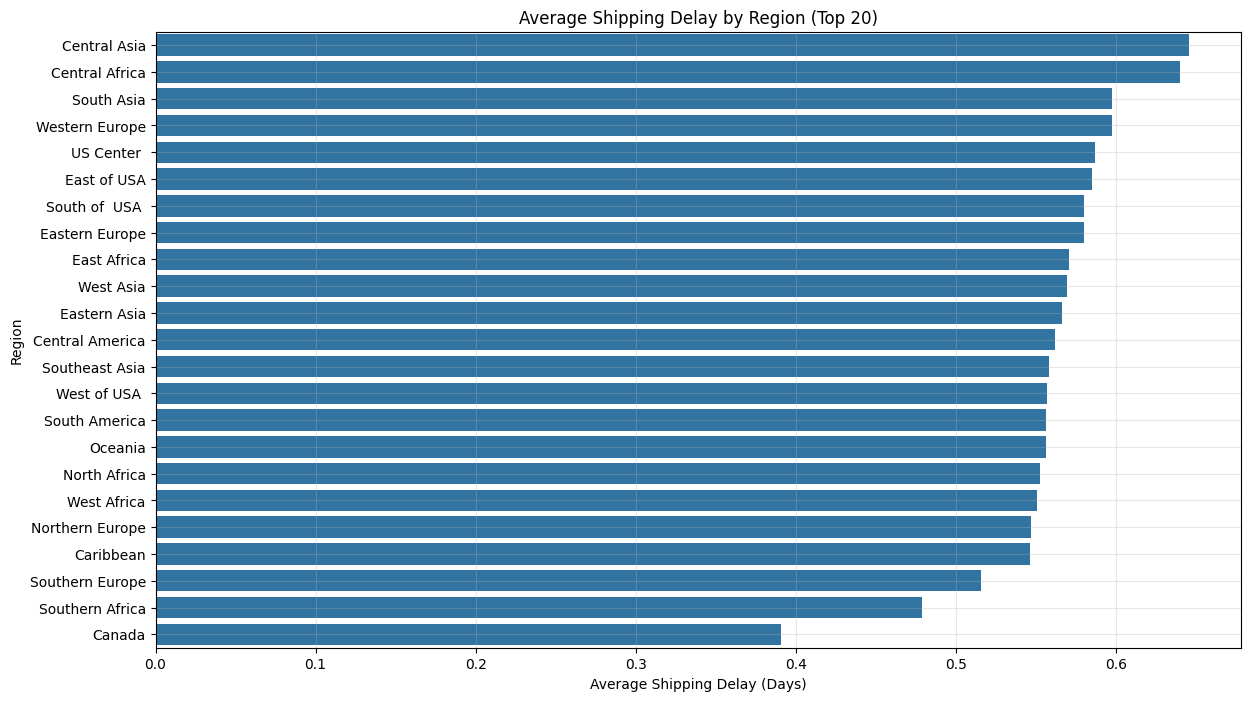

In [209]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x= 'days' , y= 'Order_Region', data= shipping_delays_average_region)
plt.xlabel('Average Shipping Delay (Days)')
plt.ylabel('Region')
plt.title('Average Shipping Delay by Region (Top 20)')
plt.grid(alpha=0.3)
plt.show()

In [144]:
shipping_delays_average_country = shipping_delays.groupby('Order_Country')['days'].mean().nlargest(20).sort_values(ascending= False).reset_index()

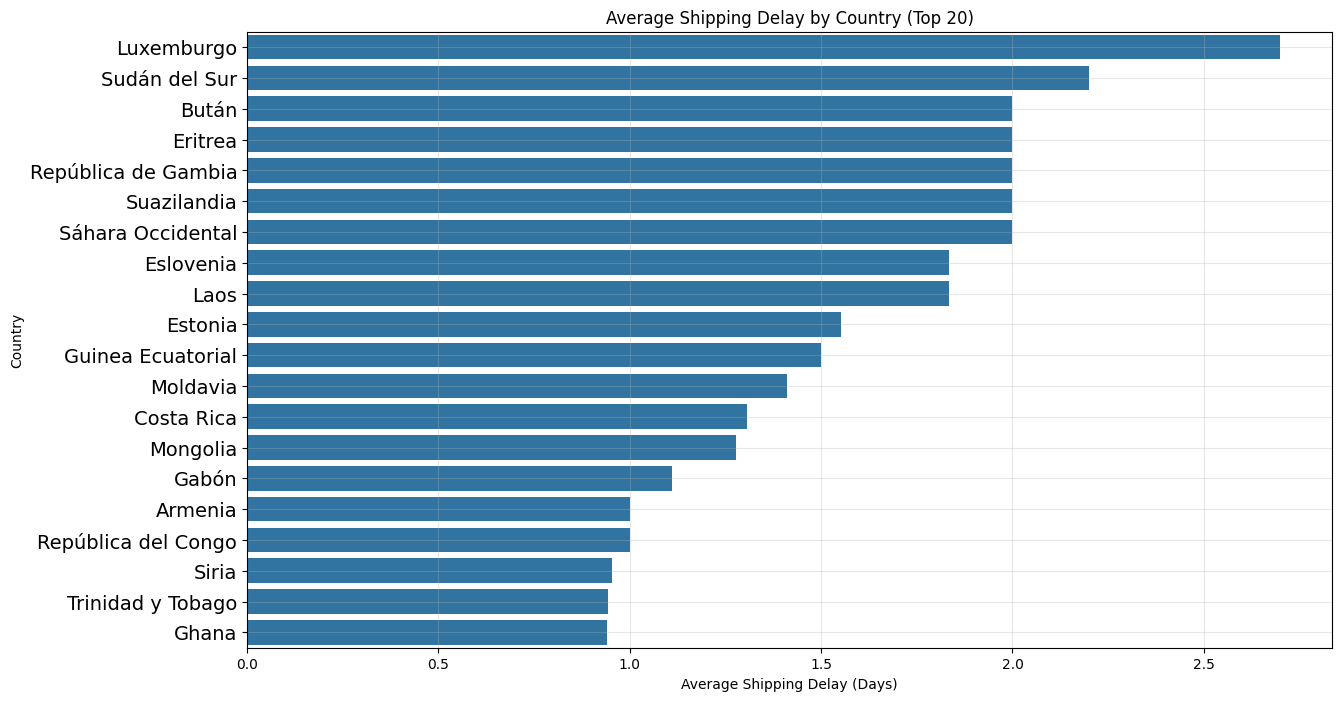

In [146]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x= 'days' , y= 'Order_Country', data= shipping_delays_average_country)
plt.xlabel('Average Shipping Delay (Days)')
plt.ylabel('Country')
plt.yticks(fontsize= 14)
plt.title('Average Shipping Delay by Country (Top 20)')
plt.grid(alpha=0.3)
plt.show()

In [191]:
shipping_delays_average_city = shipping_delays.groupby('Order_City')['days'].mean().nlargest(20).sort_values(ascending= False).reset_index()

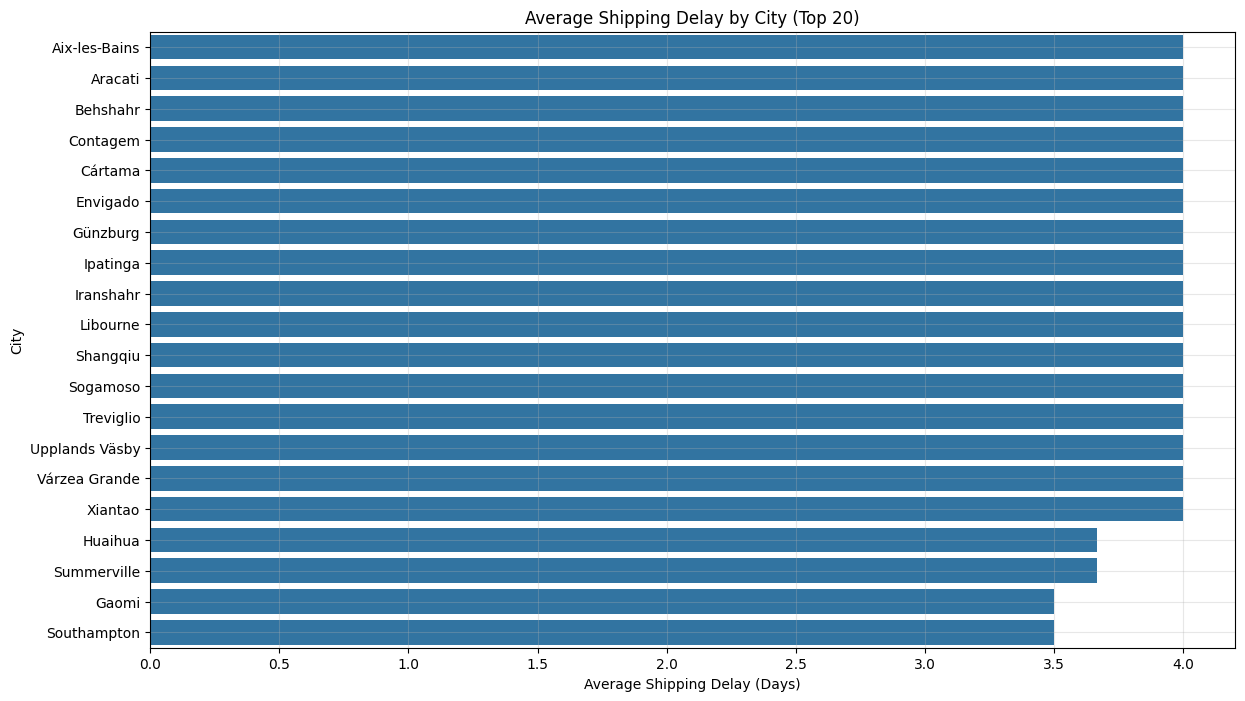

In [206]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x= 'days' , y= 'Order_City', data= shipping_delays_average_city)
plt.xlabel('Average Shipping Delay (Days)')
plt.ylabel('City')
plt.title('Average Shipping Delay by City (Top 20)')
plt.grid(alpha=0.3)
plt.show()

In [28]:
shipping_delays_average_mode = shipping_delays.groupby('Shipping_Mode')['days'].mean().sort_values(ascending= False).reset_index()

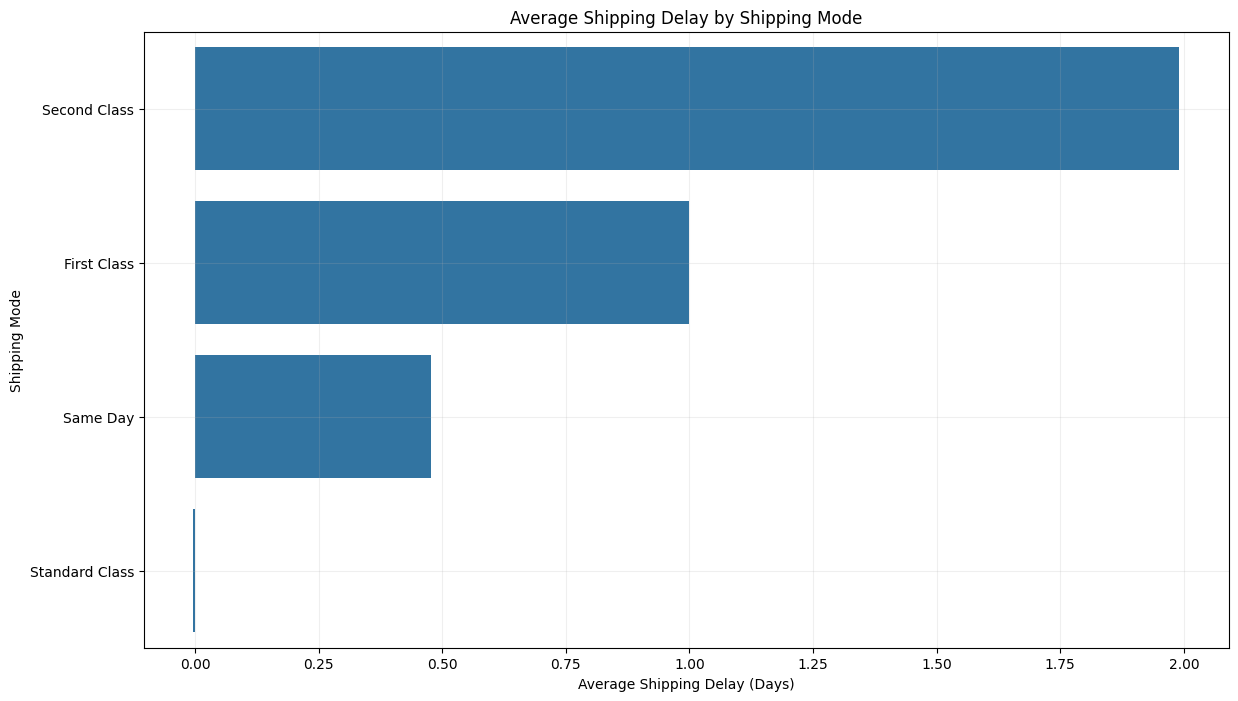

In [30]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x= 'days' , y= 'Shipping_Mode', data= shipping_delays_average_mode)
plt.xlabel('Average Shipping Delay (Days)')
plt.ylabel('Shipping Mode')
plt.title('Average Shipping Delay by Shipping Mode')
plt.grid(alpha=0.2)
plt.show()

In [17]:
days_late_filt_df = shipping_delays[shipping_delays['Delivery_Status'] == 'Late delivery']

In [18]:
days_late_filt_df = days_late_filt_df.groupby('Shipping_Mode')['days'].mean().sort_values(ascending= False).reset_index()

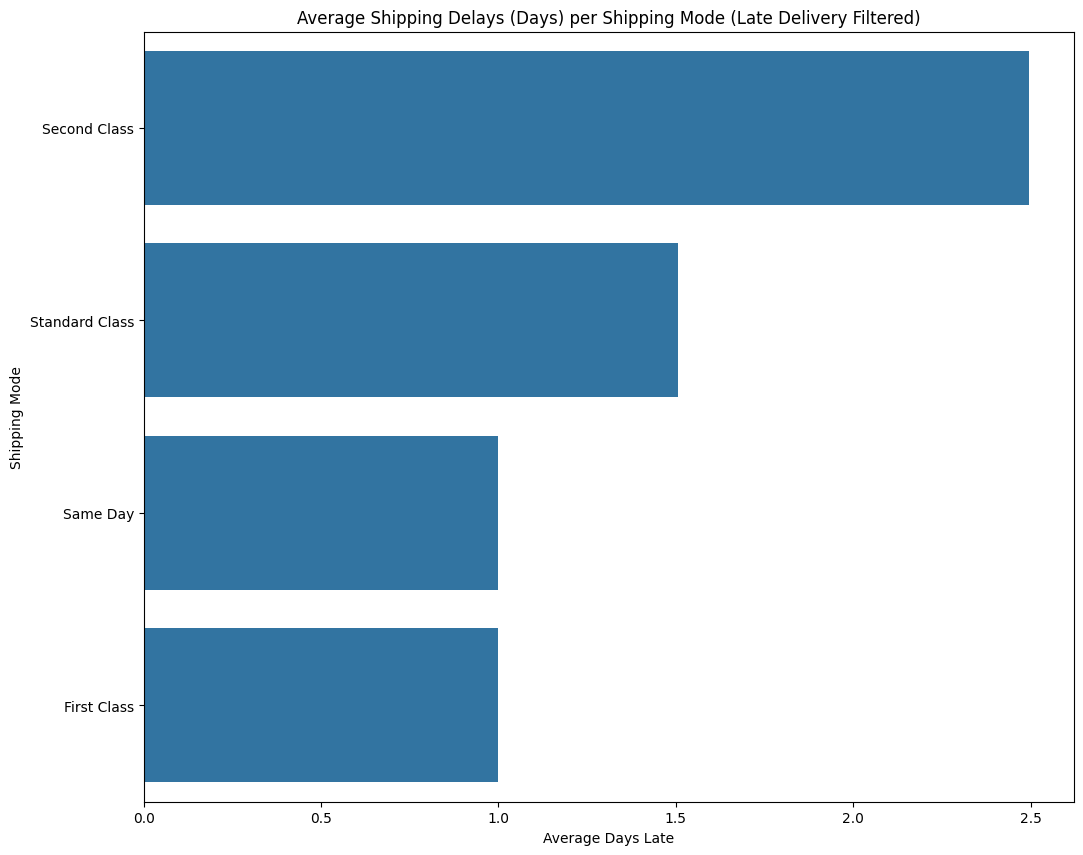

In [142]:
plt.figure(figsize=(12,10))

sns.barplot(x= 'days', y= 'Shipping_Mode', data= days_late_filt_df)
plt.title('Average Shipping Delays (Days) per Shipping Mode (Late Delivery Filtered)')
plt.ylabel('Shipping Mode')
plt.xlabel('Average Days Late')
plt.show()

In [212]:
shipping_delays_average_product = shipping_delays.groupby('Product_Name')['days'].mean().nlargest(20).sort_values(ascending= False).reset_index()

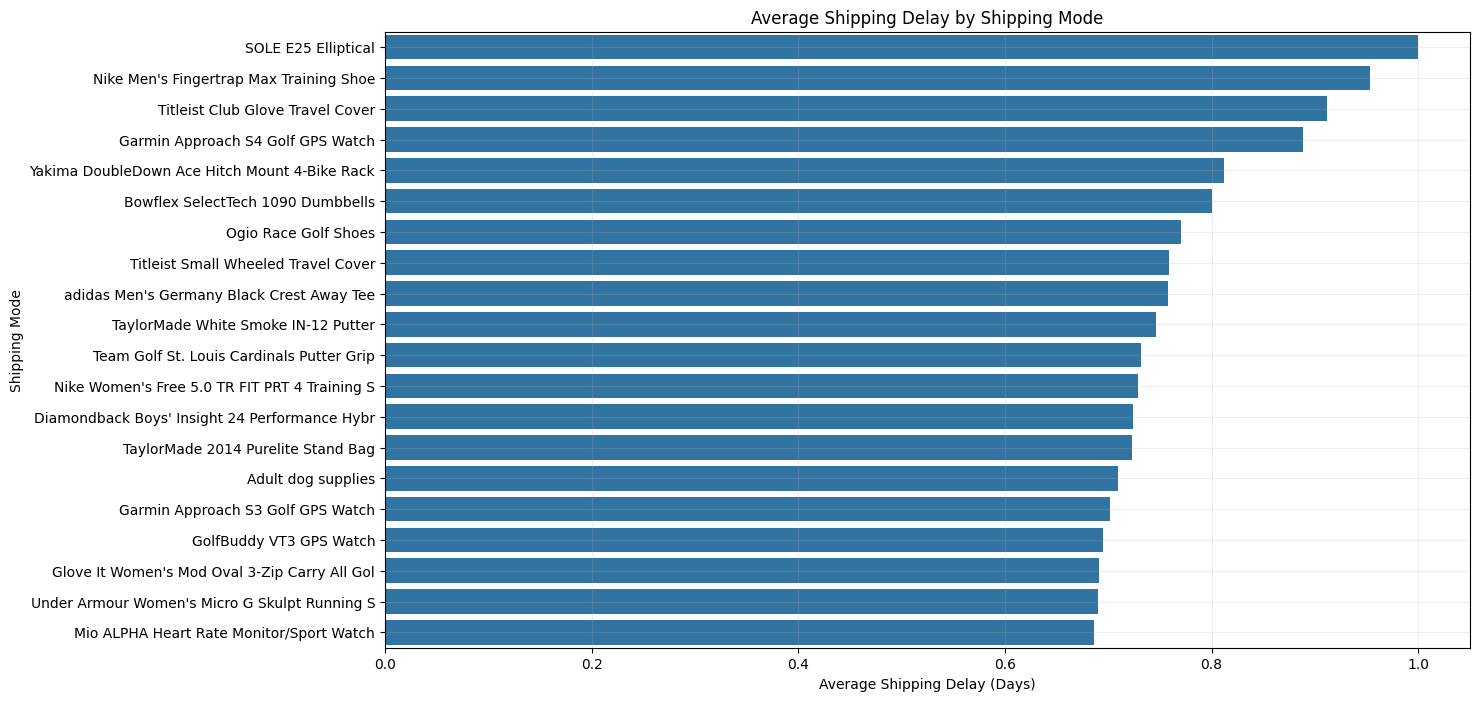

In [213]:
#visualizing
plt.figure(figsize=(14,8))

sns.barplot(x= 'days' , y= 'Product_Name', data= shipping_delays_average_product)
plt.xlabel('Average Shipping Delay (Days)')
plt.ylabel('Shipping Mode')
plt.title('Average Shipping Delay by Shipping Mode')
plt.grid(alpha=0.2)
plt.show()